# Analysis of Electric Vehicle Charging Transactions (Users)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Display all columns
pd.set_option('display.max_columns', None)

# Set visualization style
sns.set_style('darkgrid')

In [2]:
# Read in the file
user_data = pd.read_excel(
    '../Data/Daten_Public.xlsx',
    header=3,
    parse_dates = [4, 5]
)

In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Nutzergruppe                   360 non-null    object        
 1   Kostenstelle                   0 non-null      float64       
 2   Nutzer/Fahrzeug                360 non-null    object        
 3   Ladekarte                      360 non-null    object        
 4   Eingesteckt am                 360 non-null    datetime64[ns]
 5   Ausgesteckt am                 360 non-null    datetime64[ns]
 6   Ladedauer                      360 non-null    object        
 7   Zeit angesteckt                360 non-null    object        
 8   Standort                       360 non-null    object        
 9   Ladestation                    360 non-null    object        
 10  Anschluss                      360 non-null    object        
 11  EVSE-ID            

# Data preprocessing

In [4]:
# Create a function to convert duration to hours
def duration_to_hours(duration):
    parts = duration.split(' ')
    hours = 0
    minutes = 0
    seconds = 0

    for part in parts:
        if 'h' in part:
            hours = int(part[:-1])
        elif 'm' in part:
            minutes = int(part[:-1])
        elif 's' in part:
            seconds = int(part[:-1])
    return (hours + (minutes / 60) + seconds / 3600)

In [5]:
# Convert Charge time to hours only
user_data['Charge time'] = user_data['Ladedauer'].apply(duration_to_hours)

# Convert Blocking time to hours only
user_data['Blocking time'] = user_data['Zeit angesteckt'].apply(duration_to_hours)

In [6]:
# Extract month when vehicles were plugged and unplugged
user_data['Plugged_in_month'] = user_data['Eingesteckt am'].dt.month
user_data['Unplugged_month'] = user_data['Ausgesteckt am'].dt.month

# Extract week when vehicles were plugged and unplugged
user_data['Plugged_in_week'] = user_data['Eingesteckt am'].dt.isocalendar().week.astype('int')
user_data['Unplugged_week'] = user_data['Ausgesteckt am'].dt.isocalendar().week.astype('int')

# Extract day when vehicles were plugged and unplugged
user_data['Plugged_in_day'] = user_data['Eingesteckt am'].dt.day
user_data['Unplugged_day'] = user_data['Ausgesteckt am'].dt.day

# Extract time when vehicles were plugged and unplugged
user_data['Plugged_in_time'] = user_data['Eingesteckt am'].dt.time
user_data['Unplugged_time'] = user_data['Ausgesteckt am'].dt.time

# Extract dayname when vehicles were plugged and unplugged
user_data['Plugged_in_dayname'] = user_data['Eingesteckt am'].dt.day_name()
user_data['Unplugged_dayname'] = user_data['Ausgesteckt am'].dt.day_name()

# # Extract hour when vehicles were plugged and unplugged
# user_data['Plugged_in_hour'] = user_data['Eingesteckt am'].dt.hour
# user_data['Unplugged_hour'] = user_data['Ausgesteckt am'].dt.hour

In [7]:
# Convert month numbers to strings
user_data['Plugged_in_month'] = user_data['Plugged_in_month'].map({
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
    1: 'January'
})
user_data['Unplugged_month'] = user_data['Unplugged_month'].map({
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
    1: 'January'
})

In [8]:
# Convert to a categorical data in a particular order
user_data['Plugged_in_month'] = pd.Categorical(
    user_data['Plugged_in_month'],
    categories=['September', 'October', 'November', 'December', 'January']
)
user_data['Unplugged_month'] = pd.Categorical(
    user_data['Unplugged_month'],
    categories=['September', 'October', 'November', 'December', 'January']
)
user_data['Plugged_in_dayname'] = pd.Categorical(
    user_data['Plugged_in_dayname'],
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

In [9]:
# Extract the hour of plug-in and plug-out
user_data['Plugged_in_time_hour'] = user_data['Plugged_in_time'].astype(str).str.split(':').str[0]
user_data['Unplugged_time_hour'] = user_data['Unplugged_time'].astype(str).str.split(':').str[0]

In [10]:
# Obtain daytime and nighttime users
user_data_daytime = user_data.set_index('Ausgesteckt am').between_time('6:00', '18:00').reset_index()
user_data_nighttime = user_data.set_index('Ausgesteckt am').between_time('18:01', '5:59').reset_index()

In [11]:
# Obtain the hogging time
user_data['Hogging time'] = user_data['Blocking time'] - user_data['Charge time']

In [12]:
# Split into each month
user_data_september = user_data[user_data['Plugged_in_month'] == 'September']
user_data_october = user_data[user_data['Plugged_in_month'] == 'October']
user_data_november = user_data[user_data['Plugged_in_month'] == 'November']
user_data_december = user_data[user_data['Plugged_in_month'] == 'December']
user_data_january = user_data[user_data['Plugged_in_month'] == 'January']

# Exploratory Data Analysis

### Distribution of Connection time

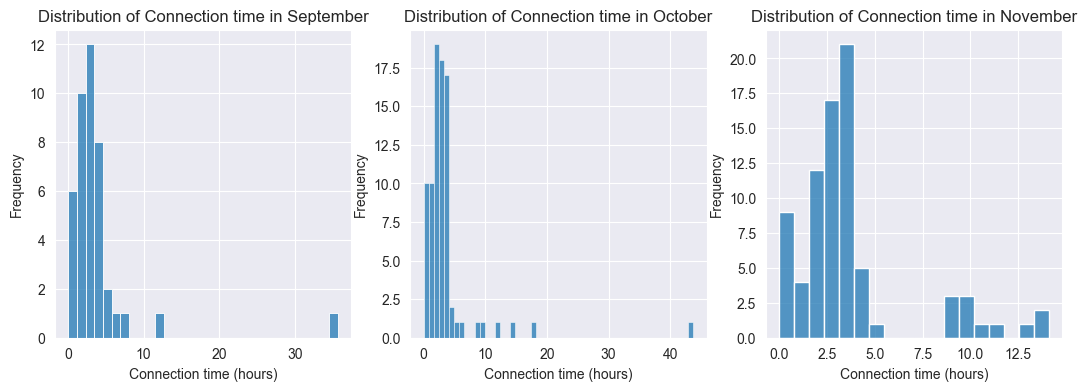

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.histplot(
    data=user_data_september,
    x='Blocking time',
    ax=ax[0]
)
ax[0].set_title('Distribution of Connection time in September')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Connection time (hours)')

# October
sns.histplot(
    data=user_data_october,
    x='Blocking time',
    ax=ax[1]
)
ax[1].set_title('Distribution of Connection time in October')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Connection time (hours)')

# November
sns.histplot(
    data=user_data_november,
    x='Blocking time',
    ax=ax[2]
)
ax[2].set_title('Distribution of Connection time in November')
ax[2].set_ylabel('Frequency')
ax[2].set_xlabel('Connection time (hours)')

# Save figure
plt.savefig('../Images/Public/Redo/connection-time-distribution-1', bbox_inches='tight')
plt.show()

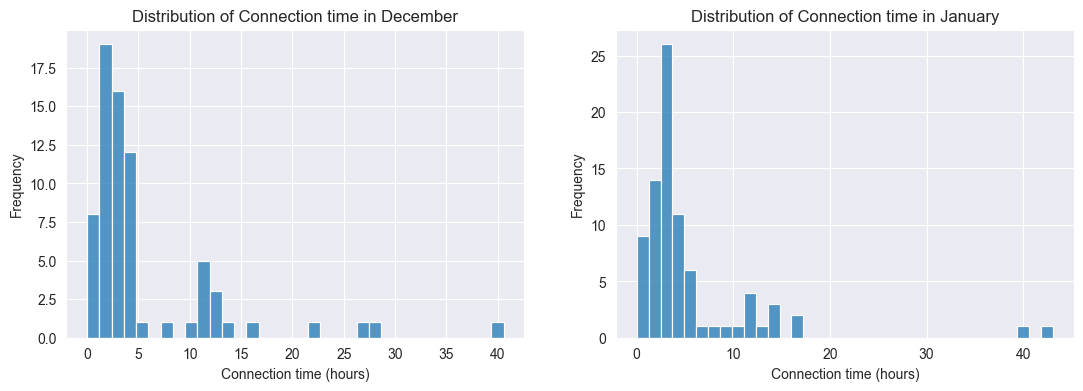

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# December
sns.histplot(
    data=user_data_december,
    x='Blocking time',
    ax=ax[0]
)
ax[0].set_title('Distribution of Connection time in December')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Connection time (hours)')

# January
sns.histplot(
    data=user_data_january,
    x='Blocking time',
    ax=ax[1]
)
ax[1].set_title('Distribution of Connection time in January')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Connection time (hours)')

# Save figure
plt.savefig('../Images/Public/Redo/connection-time-distribution-2', bbox_inches='tight')
plt.show()

### Correct outliers

#### September

In [81]:
user_data_september[user_data_september['Blocking time'] > 20]

,Nutzergruppe,Kostenstelle,Nutzer/Fahrzeug,Ladekarte,Eingesteckt am,Ausgesteckt am,Ladedauer,Zeit angesteckt,Standort,Ladestation,Anschluss,EVSE-ID,Kommentar,Preis pro kWh,Verbrauch (kWh),Netto Kosten (kWh),Steuersatz (kWh),Steuer Kosten (kWh),Brutto Kosten (kWh),Parkgebühr Tarif (pro Minute),Netto Kosten (Parkgebühr),Steuersatz (Parkgebühr),Steuer Kosten (Parkgebühr),Brutto Kosten (Parkgebühr),Kosten gesamt,Charge time,Blocking time,Plugged_in_month,Unplugged_month,Plugged_in_week,Unplugged_week,Plugged_in_day,Unplugged_day,Plugged_in_time,Unplugged_time,Plugged_in_dayname,Unplugged_dayname,Plugged_in_time_hour,Unplugged_time_hour,Hogging time
6,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-09-04 19:44:28.584,2023-09-06 07:22:07.401,6h 12m 07s,35h 37m 39s,Ulanweg,ABL_10332049,Ladepunkt 4,DE*ONE*EE94A,NaN,0.4952,67.342,28.02,19,5.33,33.35,0,0,19,0,0,33.35,6.201944,35.6275,September,September,36,36,4,6,19:44:28.584000,07:22:07.401000,Monday,Wednesday,19,07,29.425556


In [95]:
user_data_september.drop([6], inplace=True)

Consumption cannot be used to obtain blocking time since both are high. It also had the highest charge time for a session in september. The row is dropped since the blocking time cannot be aggregated by any means.

#### October

In [97]:
user_data_october[user_data_october['Blocking time'] > 40]

,Nutzergruppe,Kostenstelle,Nutzer/Fahrzeug,Ladekarte,Eingesteckt am,Ausgesteckt am,Ladedauer,Zeit angesteckt,Standort,Ladestation,Anschluss,EVSE-ID,Kommentar,Preis pro kWh,Verbrauch (kWh),Netto Kosten (kWh),Steuersatz (kWh),Steuer Kosten (kWh),Brutto Kosten (kWh),Parkgebühr Tarif (pro Minute),Netto Kosten (Parkgebühr),Steuersatz (Parkgebühr),Steuer Kosten (Parkgebühr),Brutto Kosten (Parkgebühr),Kosten gesamt,Charge time,Blocking time,Plugged_in_month,Unplugged_month,Plugged_in_week,Unplugged_week,Plugged_in_day,Unplugged_day,Plugged_in_time,Unplugged_time,Plugged_in_dayname,Unplugged_dayname,Plugged_in_time_hour,Unplugged_time_hour,Hogging time
107,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-10-23 19:03:09.684,2023-10-25 14:47:55.773,4h 53m 09s,43h 44m 46s,Ulanweg,ABL_10332049,Ladepunkt 1,DE*ONE*E7RVQ,NaN,0.4952,49.837,20.74,19,3.94,24.68,0,0,19,0,0,24.68,4.885833,43.746111,October,October,43,43,23,25,19:03:09.684000,14:47:55.773000,Monday,Wednesday,19,14,38.860278


In [101]:
# Use the mean value or not?
user_data_october[(user_data_october['Verbrauch (kWh)'] >= 40) & (user_data_october['Verbrauch (kWh)'] <= 50)]['']

,Nutzergruppe,Kostenstelle,Nutzer/Fahrzeug,Ladekarte,Eingesteckt am,Ausgesteckt am,Ladedauer,Zeit angesteckt,Standort,Ladestation,Anschluss,EVSE-ID,Kommentar,Preis pro kWh,Verbrauch (kWh),Netto Kosten (kWh),Steuersatz (kWh),Steuer Kosten (kWh),Brutto Kosten (kWh),Parkgebühr Tarif (pro Minute),Netto Kosten (Parkgebühr),Steuersatz (Parkgebühr),Steuer Kosten (Parkgebühr),Brutto Kosten (Parkgebühr),Kosten gesamt,Charge time,Blocking time,Plugged_in_month,Unplugged_month,Plugged_in_week,Unplugged_week,Plugged_in_day,Unplugged_day,Plugged_in_time,Unplugged_time,Plugged_in_dayname,Unplugged_dayname,Plugged_in_time_hour,Unplugged_time_hour,Hogging time
65,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-10-08 07:56:28.151,2023-10-08 13:51:40.854,4h 16m 30s,5h 55m 13s,Ulanweg,ABL_10332049,Ladepunkt 4,DE*ONE*EE94A,NaN,0.4952,47.111,19.60,19,3.73,23.33,0,0,19,0,0,23.33,4.275000,5.920278,October,October,40,40,8,8,07:56:28.151000,13:51:40.854000,Sunday,Sunday,07,13,1.645278
66,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-10-08 16:45:53.377,2023-10-09 07:11:58.850,4h 17m 23s,14h 26m 05s,Ulanweg,ABL_10332049,Ladepunkt 4,DE*ONE*EE94A,NaN,0.4952,47.039,19.57,19,3.72,23.29,0,0,19,0,0,23.29,4.289722,14.434722,October,October,40,41,8,9,16:45:53.377000,07:11:58.850000,Sunday,Monday,16,07,10.145000
107,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-10-23 19:03:09.684,2023-10-25 14:47:55.773,4h 53m 09s,43h 44m 46s,Ulanweg,ABL_10332049,Ladepunkt 1,DE*ONE*E7RVQ,NaN,0.4952,49.837,20.74,19,3.94,24.68,0,0,19,0,0,24.68,4.885833,43.746111,October,October,43,43,23,25,19:03:09.684000,14:47:55.773000,Monday,Wednesday,19,14,38.860278
115,Öffentliches Laden,NaN,eRoaming Nutzer,<unbekannt>,2023-10-27 19:20:18.813,2023-10-27 22:03:21.482,2h 42m 19s,2h 43m 03s,Ulanweg,ABL_10332049,Ladepunkt 1,DE*ONE*E7RVQ,NaN,0.4952,40.875,17.01,19,3.23,20.24,0,0,19,0,0,20.24,2.705278,2.717500,October,October,43,43,27,27,19:20:18.813000,22:03:21.482000,Friday,Friday,19,22,0.012222


### Connection time (monthly)

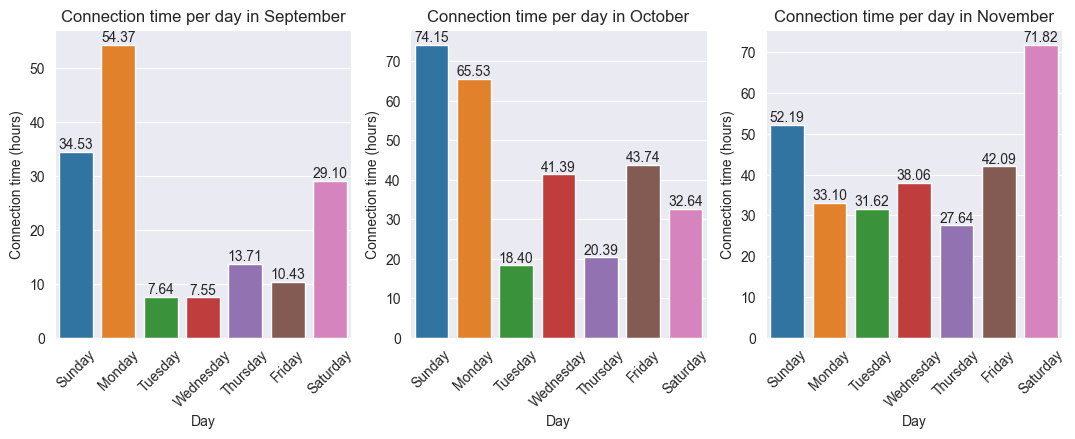

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.barplot(
    data=user_data_september.sort_values('Plugged_in_dayname'),
    y='Blocking time',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[0]
)
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Connection time per day in September')
ax[0].set_ylabel('Connection time (hours)')
ax[0].set_xlabel('Day')
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.2f')

# October
sns.barplot(
    data=user_data_october.sort_values('Plugged_in_dayname'),
    y='Blocking time',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[1]
)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Connection time per day in October')
ax[1].set_ylabel('Connection time (hours)')
ax[1].set_xlabel('Day')
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.2f')

# September
sns.barplot(
    data=user_data_november.sort_values('Plugged_in_dayname'),
    y='Blocking time',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[2]
)
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Connection time per day in November')
ax[2].set_ylabel('Connection time (hours)')
ax[2].set_xlabel('Day')
ax[2].bar_label(ax[2].containers[0], fontsize=10, fmt='%.2f')

# Save figure
plt.savefig('../Images/Public/Redo/connection-time-per-day-1', bbox_inches='tight')
plt.show()

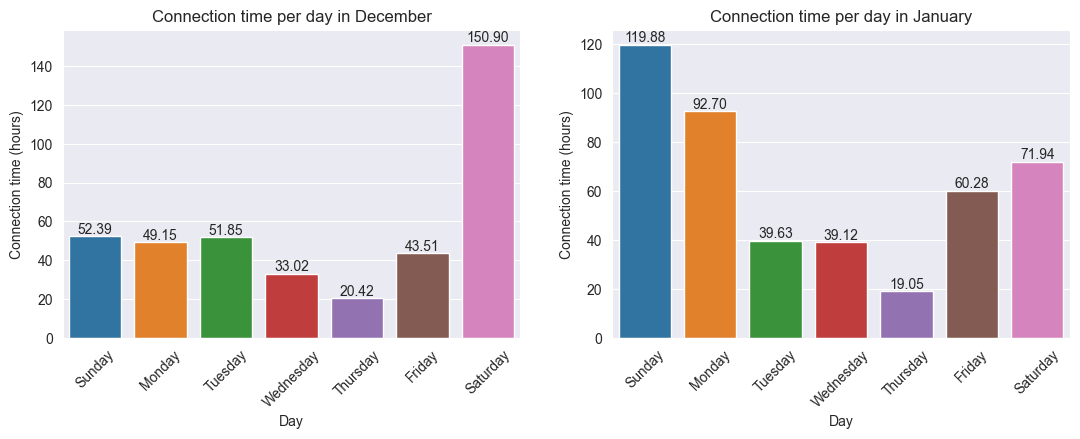

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# December
sns.barplot(
    data=user_data_december.sort_values('Plugged_in_dayname'),
    y='Blocking time',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title('Connection time per day in December')
ax[0].set_ylabel('Connection time (hours)')
ax[0].set_xlabel('Day')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.2f')

# January
sns.barplot(
    data=user_data_january.sort_values('Plugged_in_dayname'),
    y='Blocking time',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title('Connection time per day in January')
ax[1].set_ylabel('Connection time (hours)')
ax[1].set_xlabel('Day')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.2f')

# Save figure
plt.savefig('../Images/Public/Redo/connection-time-per-day-2', bbox_inches='tight')
plt.show()

### Distribution of Charge time

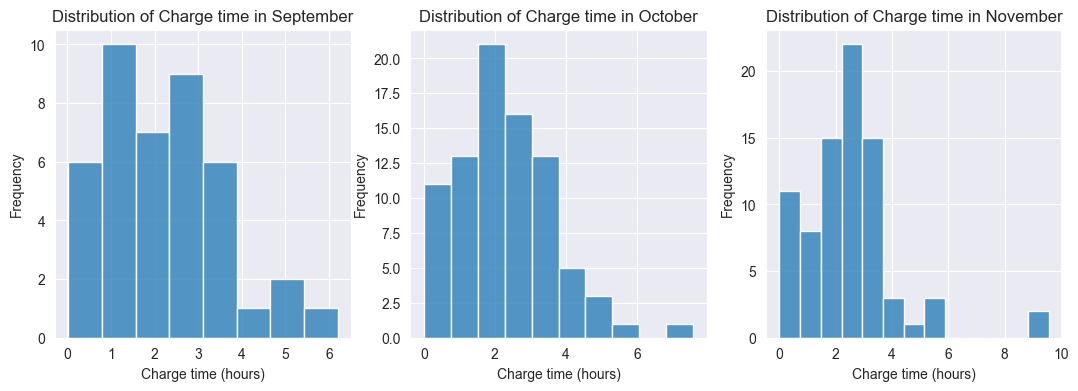

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.histplot(
    data=user_data_september,
    x='Charge time',
    ax=ax[0]
)
ax[0].set_title('Distribution of Charge time in September')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Charge time (hours)')

# October
sns.histplot(
    data=user_data_october,
    x='Charge time',
    ax=ax[1]
)
ax[1].set_title('Distribution of Charge time in October')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Charge time (hours)')

# November
sns.histplot(
    data=user_data_november,
    x='Charge time',
    ax=ax[2]
)
ax[2].set_title('Distribution of Charge time in November')
ax[2].set_ylabel('Frequency')
ax[2].set_xlabel('Charge time (hours)')

# Save figure
plt.savefig('../Images/Public/Redo/charge-time-distribution-1', bbox_inches='tight')
plt.show()

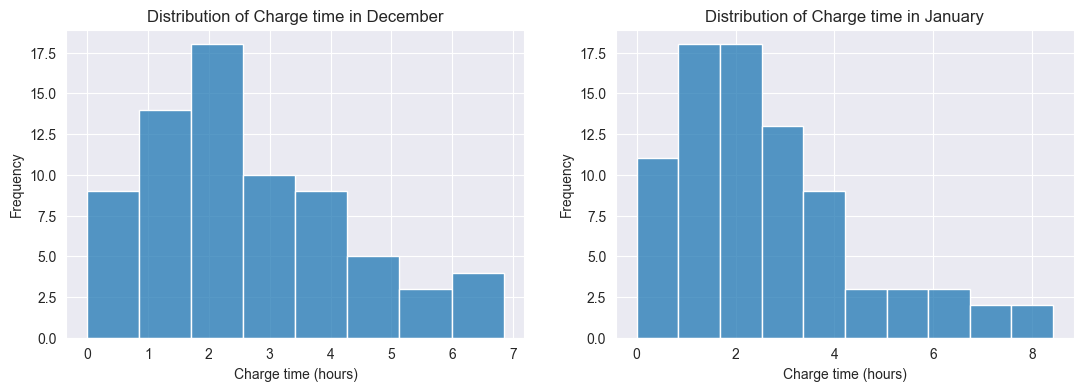

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# December
sns.histplot(
    data=user_data_december,
    x='Charge time',
    ax=ax[0]
)
ax[0].set_title('Distribution of Charge time in December')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Charge time (hours)')

# January
sns.histplot(
    data=user_data_january,
    x='Charge time',
    ax=ax[1]
)
ax[1].set_title('Distribution of Charge time in January')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Charge time (hours)')

# Save figure
plt.savefig('../Images/Public/Redo/charge-time-distribution-2', bbox_inches='tight')
plt.show()

### Distribution of Consumption

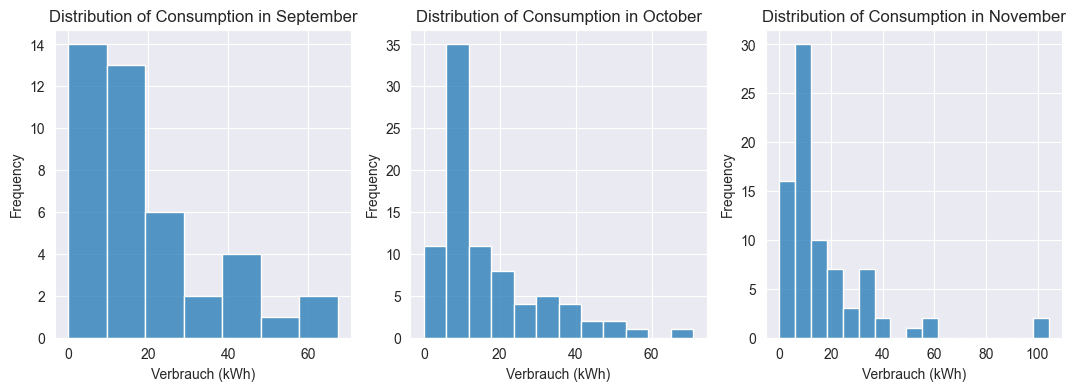

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.histplot(
    data=user_data_september,
    x='Verbrauch (kWh)',
    ax=ax[0]
)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Verbrauch (kWh)')
ax[0].set_title('Distribution of Consumption in September')

# October
sns.histplot(
    data=user_data_october,
    x='Verbrauch (kWh)',
    ax=ax[1]
)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Verbrauch (kWh)')
ax[1].set_title('Distribution of Consumption in October')

# November
sns.histplot(
    data=user_data_november,
    x='Verbrauch (kWh)',
    ax=ax[2]
)
ax[2].set_ylabel('Frequency')
ax[2].set_xlabel('Verbrauch (kWh)')
ax[2].set_title('Distribution of Consumption in November')

# Save figure
plt.savefig('../Images/Public/Redo/consumption-distribution-1', bbox_inches='tight')
plt.show()

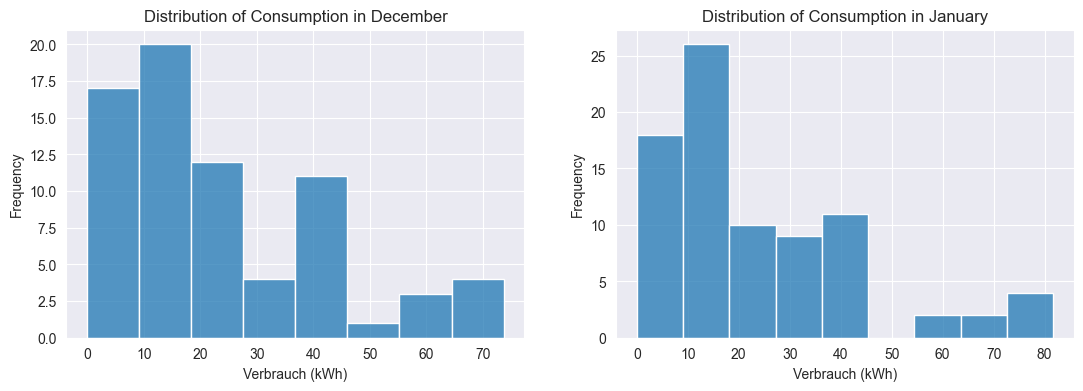

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# December
sns.histplot(
    data=user_data_december,
    x='Verbrauch (kWh)',
    ax=ax[0]
)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Verbrauch (kWh)')
ax[0].set_title('Distribution of Consumption in December')

# January
sns.histplot(
    data=user_data_january,
    x='Verbrauch (kWh)',
    ax=ax[1]
)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Verbrauch (kWh)')
ax[1].set_title('Distribution of Consumption in January')

# Save figure
plt.savefig('../Images/Public/Redo/consumption-distribution-2', bbox_inches='tight')
plt.show()

### Consumption (monthly)

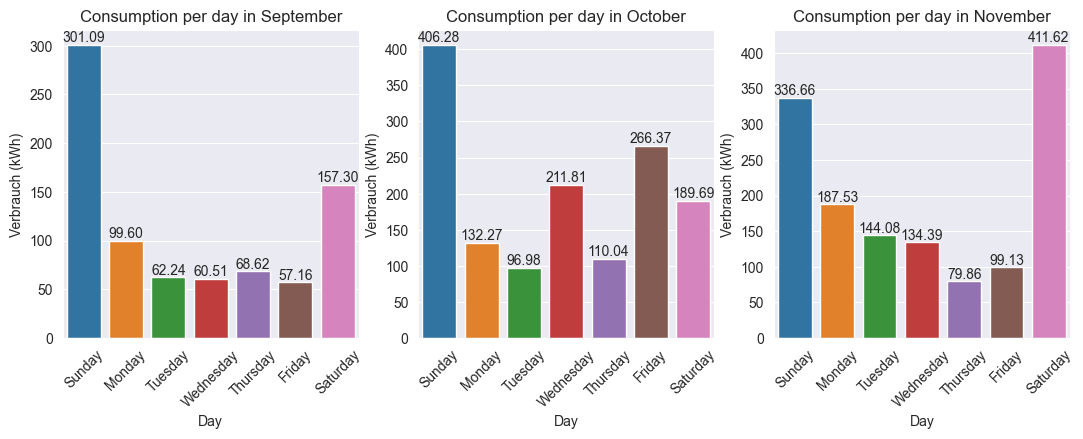

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.barplot(
    data=user_data_september.sort_values('Plugged_in_dayname'),
    y='Verbrauch (kWh)',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title('Consumption per day in September')
ax[0].set_ylabel('Verbrauch (kWh)')
ax[0].set_xlabel('Day')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.2f')

# October
sns.barplot(
    data=user_data_october.sort_values('Plugged_in_dayname'),
    y='Verbrauch (kWh)',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title('Consumption per day in October')
ax[1].set_ylabel('Verbrauch (kWh)')
ax[1].set_xlabel('Day')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.2f')

# November
sns.barplot(
    data=user_data_november.sort_values('Plugged_in_dayname'),
    y='Verbrauch (kWh)',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[2]
)
ax[2].set_title('Consumption per day in November')
ax[2].set_ylabel('Verbrauch (kWh)')
ax[2].set_xlabel('Day')
ax[2].tick_params(axis='x', rotation=45)
ax[2].bar_label(ax[2].containers[0], fontsize=10, fmt='%.2f')

# Save figure
plt.savefig('../Images/Public/Redo/consumption-per-day-1', bbox_inches='tight')
plt.show()

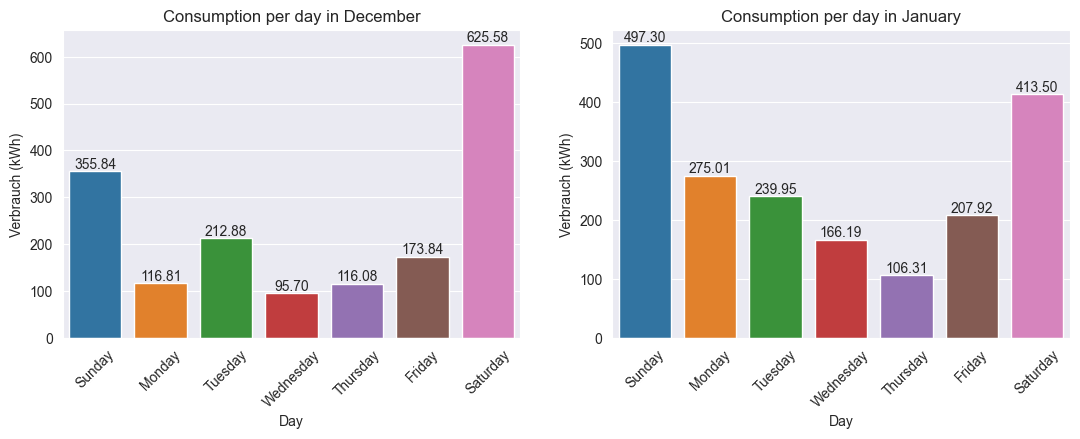

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# December
sns.barplot(
    data=user_data_december.sort_values('Plugged_in_dayname'),
    y='Verbrauch (kWh)',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title('Consumption per day in December')
ax[0].set_ylabel('Verbrauch (kWh)')
ax[0].set_xlabel('Day')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.2f')

# January
sns.barplot(
    data=user_data_january.sort_values('Plugged_in_dayname'),
    y='Verbrauch (kWh)',
    x='Plugged_in_dayname',
    estimator='sum',
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title('Consumption per day in January')
ax[1].set_ylabel('Verbrauch (kWh)')
ax[1].set_xlabel('Day')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.2f')

# Save figure
plt.savefig('../Images/Public/Redo/consumption-per-day-2', bbox_inches='tight')
plt.show()

### Distribution of Hogging time

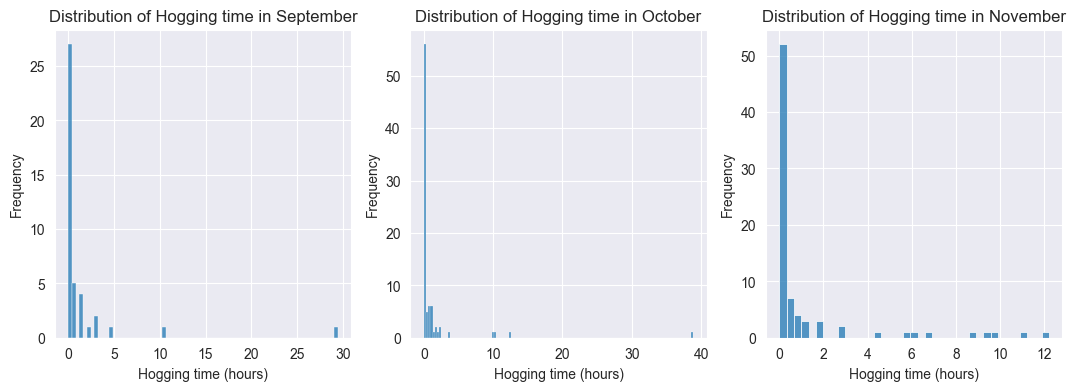

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# September
sns.histplot(
    data=user_data_september,
    x='Hogging time',
    ax=ax[0]
)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Hogging time (hours)')
ax[0].set_title('Distribution of Hogging time in September')

# October
sns.histplot(
    data=user_data_october,
    x='Hogging time',
    ax=ax[1]
)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Hogging time (hours)')
ax[1].set_title('Distribution of Hogging time in October')

# November
sns.histplot(
    data=user_data_november,
    x='Hogging time',
    ax=ax[2]
)
ax[2].set_ylabel('Frequency')
ax[2].set_xlabel('Hogging time (hours)')
ax[2].set_title('Distribution of Hogging time in November')

# Save figure
plt.savefig('../Images/Public/Redo/hogging-time-distribution-1', bbox_inches='tight')
plt.show()

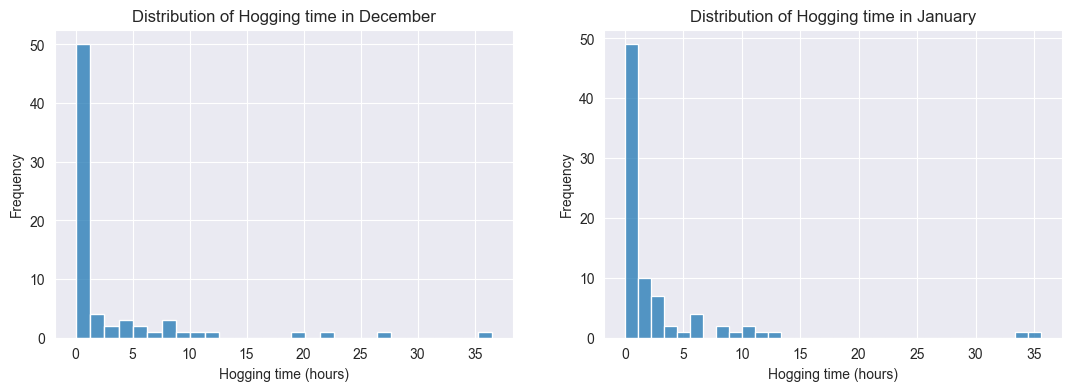

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# September
sns.histplot(
    data=user_data_december,
    x='Hogging time',
    ax=ax[0]
)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Hogging time (hours)')
ax[0].set_title('Distribution of Hogging time in December')

# October
sns.histplot(
    data=user_data_january,
    x='Hogging time',
    ax=ax[1]
)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Hogging time (hours)')
ax[1].set_title('Distribution of Hogging time in January')

# Save figure
plt.savefig('../Images/Public/Redo/hogging-time-distribution-2', bbox_inches='tight')
plt.show()

### Connection and charge time (monthly)

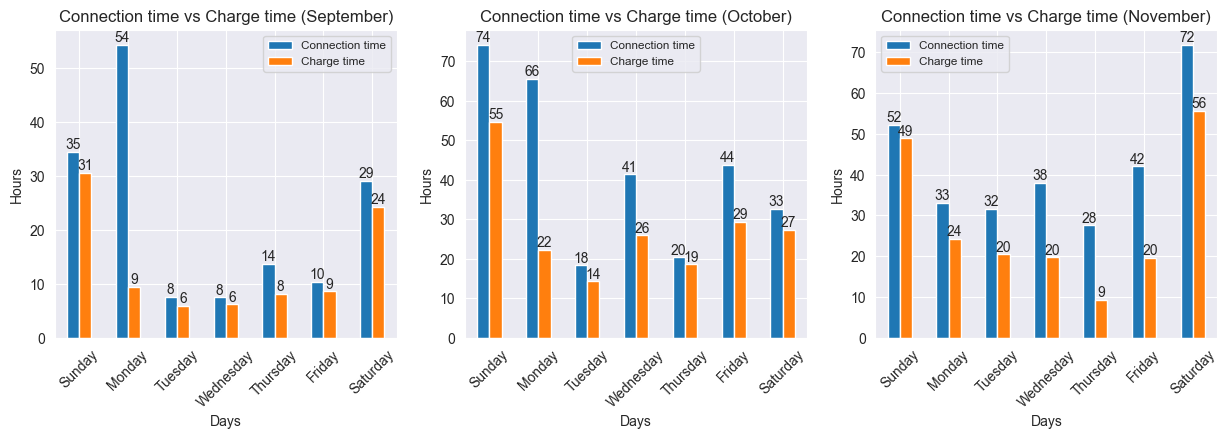

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# September
user_data_september.groupby('Plugged_in_dayname')[['Blocking time', 'Charge time']].sum().plot(kind='bar', ax=ax[0])
#ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Hours')
ax[0].legend(['Connection time', 'Charge time'], fontsize=8.5)
ax[0].set_title('Connection time vs Charge time (September)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.0f')
ax[0].bar_label(ax[0].containers[1], fontsize=10, fmt='%.0f')

# October
user_data_october.groupby('Plugged_in_dayname')[['Blocking time', 'Charge time']].sum().plot(kind='bar', ax=ax[1])
#ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Hours')
ax[1].legend(['Connection time', 'Charge time'], loc='upper center', fontsize=8.5)
ax[1].set_title('Connection time vs Charge time (October)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.0f')
ax[1].bar_label(ax[1].containers[1], fontsize=10, fmt='%.0f')

# November
user_data_november.groupby('Plugged_in_dayname')[['Blocking time', 'Charge time']].sum().plot(kind='bar', ax=ax[2])
#ax[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Hours')
ax[2].legend(['Connection time', 'Charge time'], loc='upper left', fontsize=8.5)
ax[2].set_title('Connection time vs Charge time (November)')
ax[2].tick_params(axis='x', rotation=45)
ax[2].bar_label(ax[2].containers[0], fontsize=10, fmt='%.0f')
ax[2].bar_label(ax[2].containers[1], fontsize=10, fmt='%.0f')

# Save figure
plt.savefig('../Images/Public/Redo/average-connection-charge-time-per-day-1', bbox_inches='tight')
plt.show()

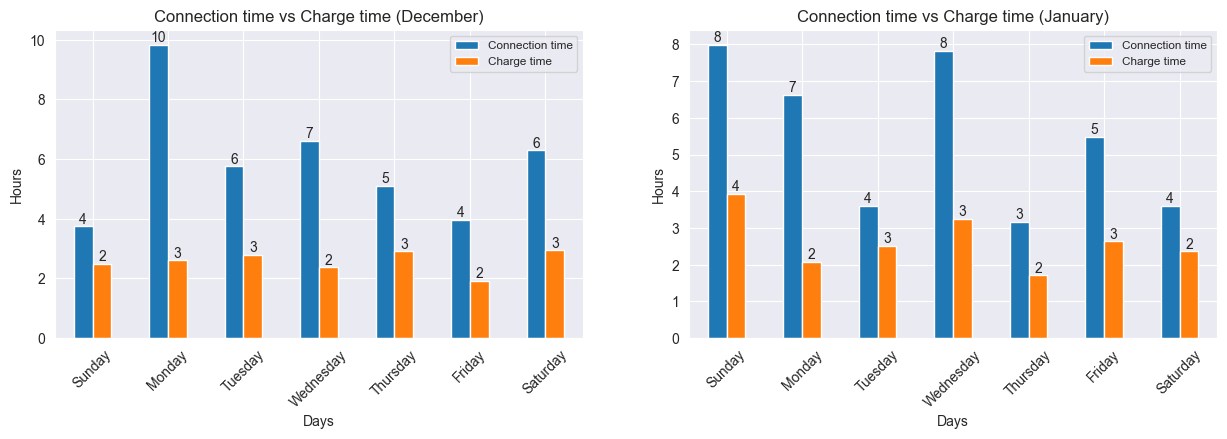

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# September
user_data_december.groupby('Plugged_in_dayname')[['Blocking time', 'Charge time']].mean().plot(kind='bar', ax=ax[0])
#ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Hours')
ax[0].legend(['Connection time', 'Charge time'], fontsize=8.5)
ax[0].set_title('Connection time vs Charge time (December)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10, fmt='%.0f')
ax[0].bar_label(ax[0].containers[1], fontsize=10, fmt='%.0f')

# October
user_data_january.groupby('Plugged_in_dayname')[['Blocking time', 'Charge time']].mean().plot(kind='bar', ax=ax[1])
#ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Hours')
ax[1].legend(['Connection time', 'Charge time'], fontsize=8.5)
ax[1].set_title('Connection time vs Charge time (January)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10, fmt='%.0f')
ax[1].bar_label(ax[1].containers[1], fontsize=10, fmt='%.0f')

# Save figure
plt.savefig('../Images/Public/Redo/average-connection-charge-time-2', bbox_inches='tight')
plt.show()

### Number of charge sessions

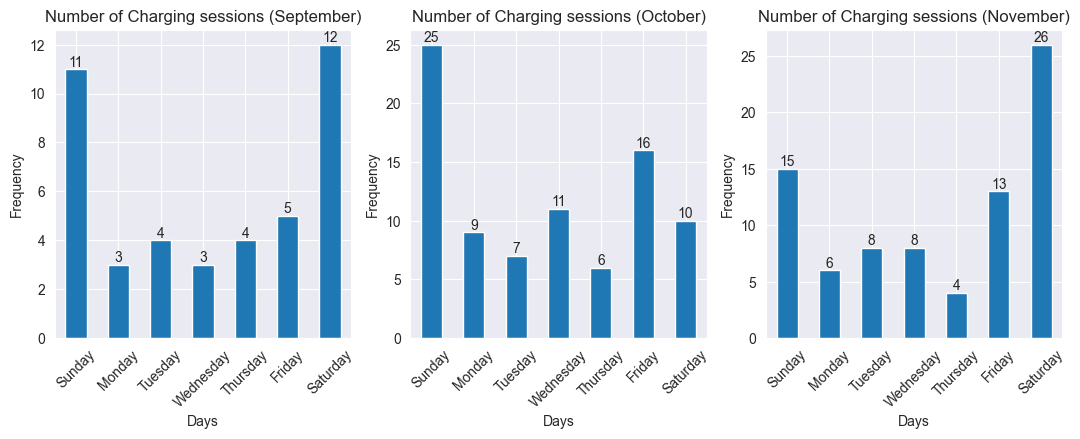

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(13,4))

# September
user_data_september.groupby('Plugged_in_dayname')['Charge time'].count().plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Number of Charging sessions (September)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10)

# October
user_data_october.groupby('Plugged_in_dayname')['Charge time'].count().plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Number of Charging sessions (October)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10)

# November
user_data_november.groupby('Plugged_in_dayname')['Charge time'].count().plot(kind='bar', ax=ax[2])
ax[2].set_xlabel('Days')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Number of Charging sessions (November)')
ax[2].tick_params(axis='x', rotation=45)
ax[2].bar_label(ax[2].containers[0], fontsize=10)

# Save figure
plt.savefig('../Images/Public/Redo/charge-sessions-per-day-1', bbox_inches='tight')
plt.show()

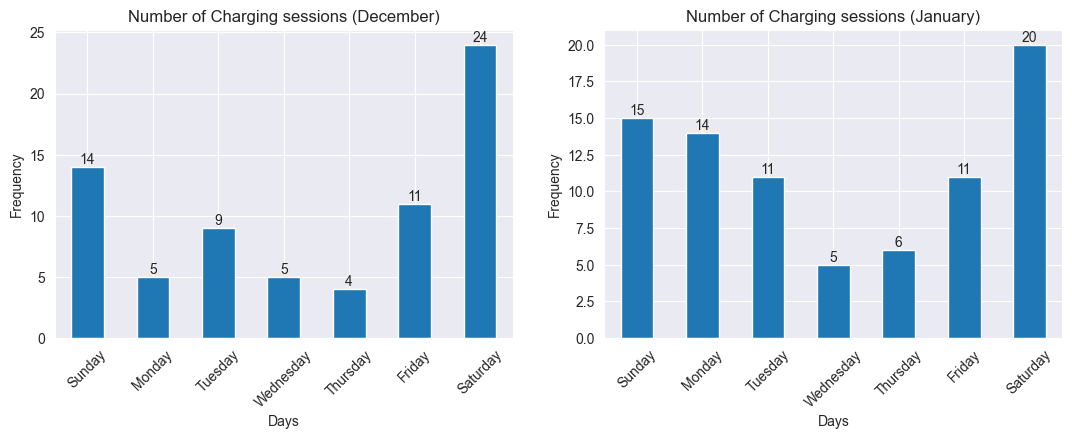

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

# December
user_data_december.groupby('Plugged_in_dayname')['Charge time'].count().plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Number of Charging sessions (December)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].bar_label(ax[0].containers[0], fontsize=10)

# January
user_data_january.groupby('Plugged_in_dayname')['Charge time'].count().plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Number of Charging sessions (January)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].bar_label(ax[1].containers[0], fontsize=10)

# Save figure
plt.savefig('../Images/Public/Redo/charge-sessions-per-day-2', bbox_inches='tight')
plt.show()

### Plug-in and plug-out frequency

In [32]:
plug_in = user_data.groupby(['Plugged_in_time_hour'])['Plugged_in_time_hour'].value_counts(dropna=False).reset_index()
plug_out = user_data.groupby(['Unplugged_time_hour'])['Unplugged_time_hour'].value_counts(dropna=False).reset_index()

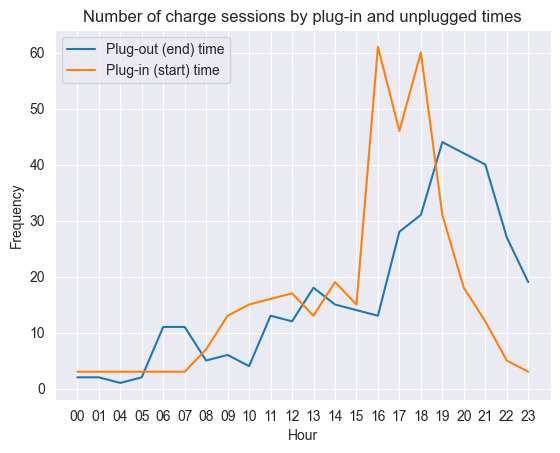

In [33]:
sns.lineplot(
    data=plug_out,
    x='Unplugged_time_hour',
    y='count',
    label='Plug-out (end) time',
)
sns.lineplot(
    data=plug_in,
    x='Plugged_in_time_hour',
    y='count',
    label='Plug-in (start) time',
)
plt.title('Number of charge sessions by plug-in and unplugged times')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend()

# Save figure
plt.savefig('../Images/Public/Redo/number-of-charge-sessions-per-plugin-unplugged-times', bbox_inches='tight')
plt.show()

### Connection time of each user

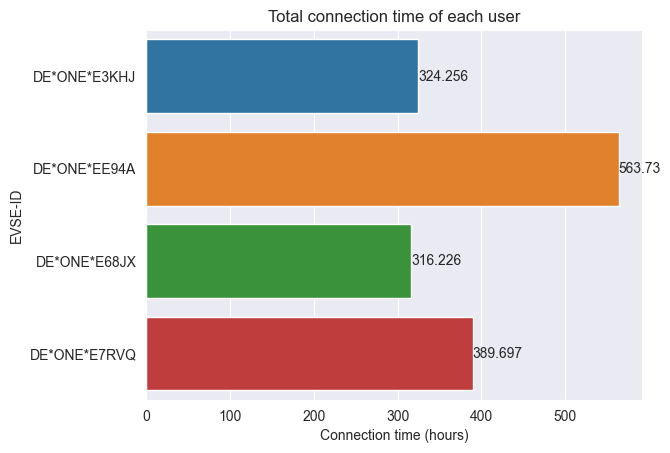

In [35]:
ax = sns.barplot(
    data=user_data,
    y='EVSE-ID',
    x='Blocking time',
    estimator='sum',
    errorbar=None
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Connection time (hours)')
plt.title('Total connection time of each user')
plt.savefig('../Images/Public/Redo/blocking-time-user', bbox_inches='tight')
plt.show()

### Charge time of each user

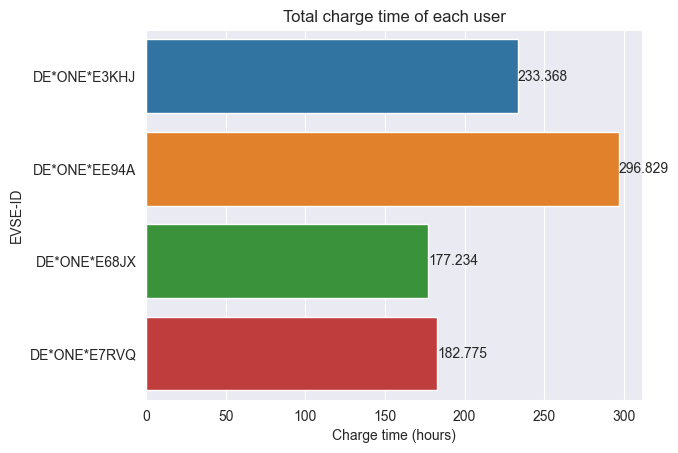

In [34]:
ax = sns.barplot(
    data=user_data,
    y='EVSE-ID',
    x='Charge time',
    estimator='sum',
    errorbar=None
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Charge time (hours)')
plt.title('Total charge time of each user')
plt.savefig('../Images/Public/Redo/charge-session-user', bbox_inches='tight')
plt.show()

### Hogging time of each user

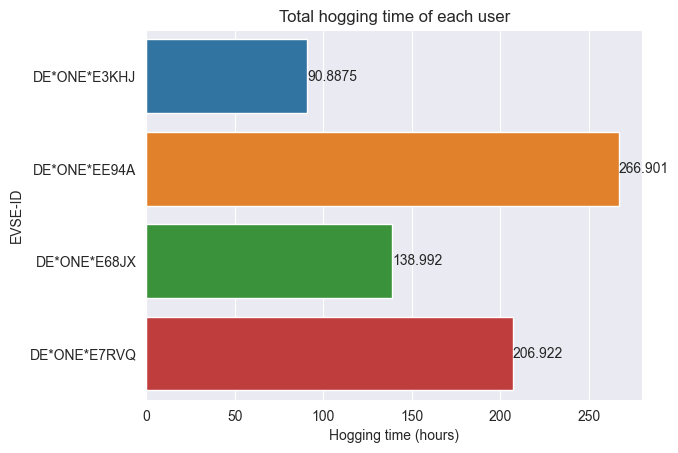

In [37]:
ax = sns.barplot(
    data=user_data,
    y='EVSE-ID',
    x='Hogging time',
    estimator='sum',
    errorbar=None
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Hogging time (hours)')
plt.title('Total hogging time of each user')
plt.savefig('../Images/Public/Redo/hogging-time-user', bbox_inches='tight')
plt.show()

### Charge utilization of vehicles

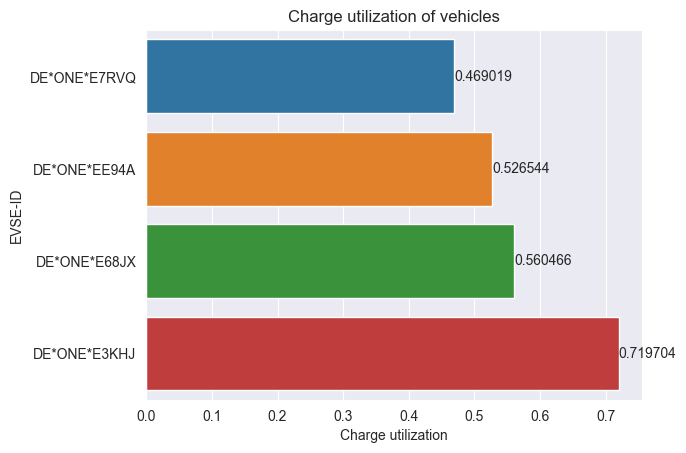

In [38]:
user_data_charge_util = user_data.groupby('EVSE-ID')[['Blocking time', 'Charge time']].sum().reset_index()
user_data_charge_util['Charge utilization'] = user_data_charge_util['Charge time'] / user_data_charge_util['Blocking time']
#fig, ax = plt.subplots(figsize=(10,4))
ax = sns.barplot(
    data=user_data_charge_util.sort_values(['Charge utilization']),
    x='Charge utilization',
    y='EVSE-ID'
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Charge utilization of vehicles')
plt.savefig('../Images/Public/Redo/charge-utilization-user', bbox_inches='tight')
plt.show()

In [40]:
user_data_charge_util

,EVSE-ID,Blocking time,Charge time,Charge utilization
0,DE*ONE*E3KHJ,324.255833,233.368333,0.719704
1,DE*ONE*E68JX,316.225833,177.233889,0.560466
2,DE*ONE*E7RVQ,389.696667,182.775000,0.469019
3,DE*ONE*EE94A,563.730000,296.828611,0.526544


### Consumption per month

In [43]:
user_data.groupby(['Plugged_in_month'])['Verbrauch (kWh)'].sum()

Plugged_in_month
September     806.527
October      1413.450
November     1393.269
December     1696.735
January      1906.173
Name: Verbrauch (kWh), dtype: float64

In [44]:
user_data.groupby('Ladestation')['Anschluss'].value_counts()

Ladestation   Anschluss         
ABL_10332049  Ladepunkt 4           71
              Ladepunkt 2           67
              Ladepunkt 3           57
              Ladepunkt 1           39
              Ladepunkt 2 links     39
              Ladepunkt 1 links     34
              Ladepunkt 4 rechts    27
              Ladepunkt 3 rechts    26
Name: count, dtype: int64

In [45]:
# Map the charge points correctly
user_data['Anschluss'] = user_data['Anschluss'].map({
    'Ladepunkt 1': 'Ladepunkt 1',
    'Ladepunkt 1 links': 'Ladepunkt 1',
    'Ladepunkt 2': 'Ladepunkt 2',
    'Ladepunkt 2 links': 'Ladepunkt 2',
    'Ladepunkt 3': 'Ladepunkt 3',
    'Ladepunkt 3 rechts': 'Ladepunkt 3',
    'Ladepunkt 4': 'Ladepunkt 4',
    'Ladepunkt 4 rechts': 'Ladepunkt 4'
})

In [46]:
# Split the charge stations into two
def rename_charge_station(df):
    if df['Anschluss'] == 'Ladepunkt 1' or df['Anschluss'] == 'Ladepunkt 2':
        ladestation = 'ABL_10332049_A'
    else:
        ladestation = 'ABL_10332049_B'
    return ladestation

In [47]:
user_data['Ladestation'] = user_data.apply(rename_charge_station, axis=1)

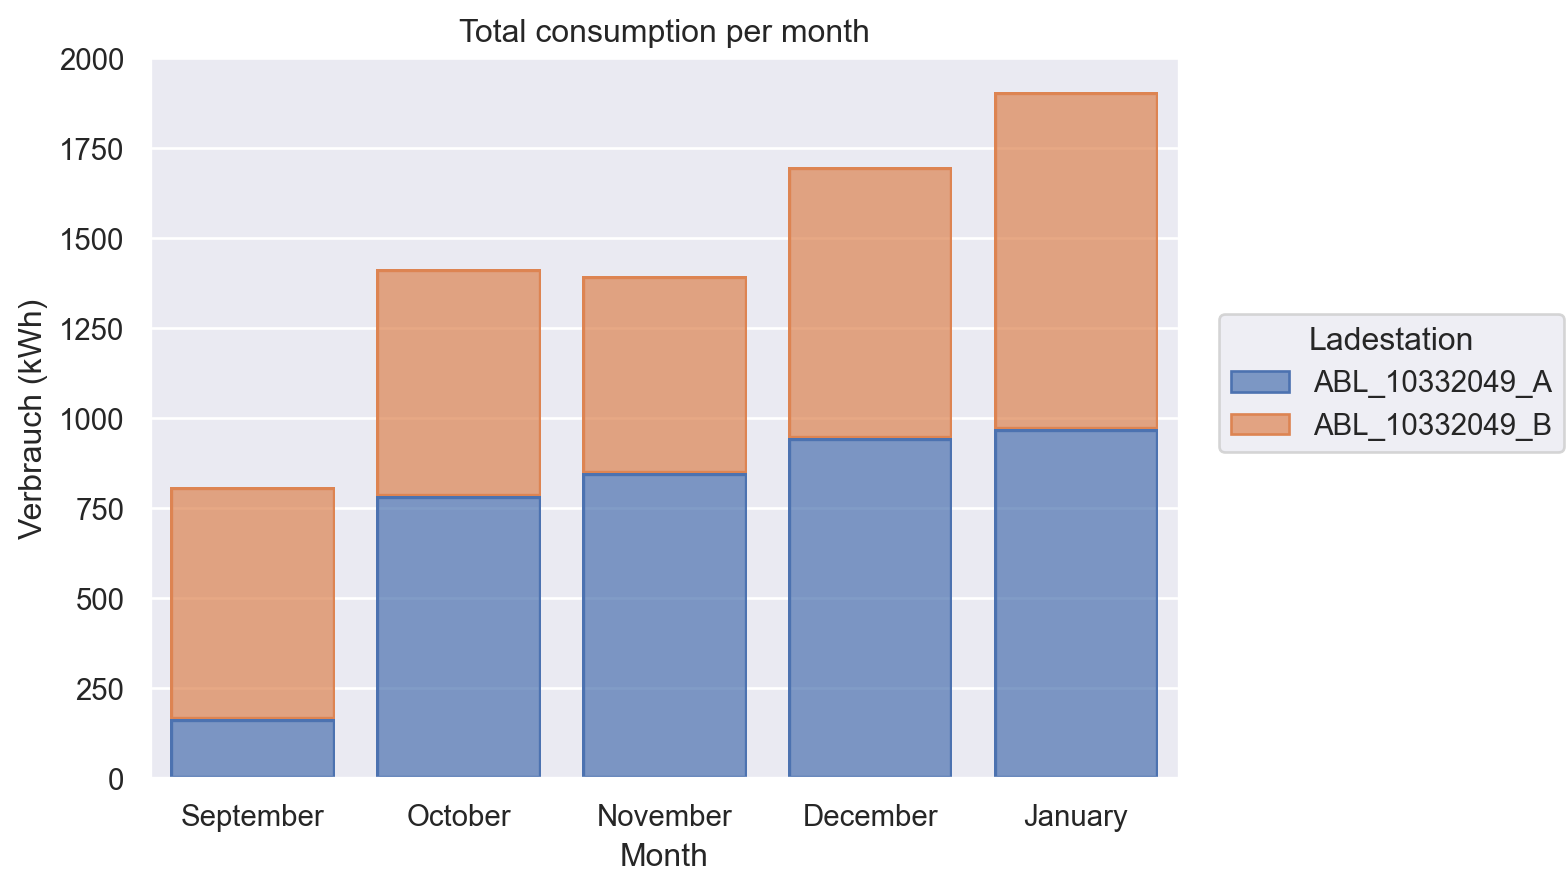

In [49]:
# Obtain consumption of each station per month
x = (
    so.Plot(user_data, x="Plugged_in_month", y='Verbrauch (kWh)', color='Ladestation')
    .add(so.Bar(), so.Agg('sum'), so.Stack())
    .label(y='Verbrauch (kWh)', x='Month', title='Total consumption per month')
)

# Save figure
x.save('../Images/Public/Redo/consumption-per-month')

### Consumption per charge station

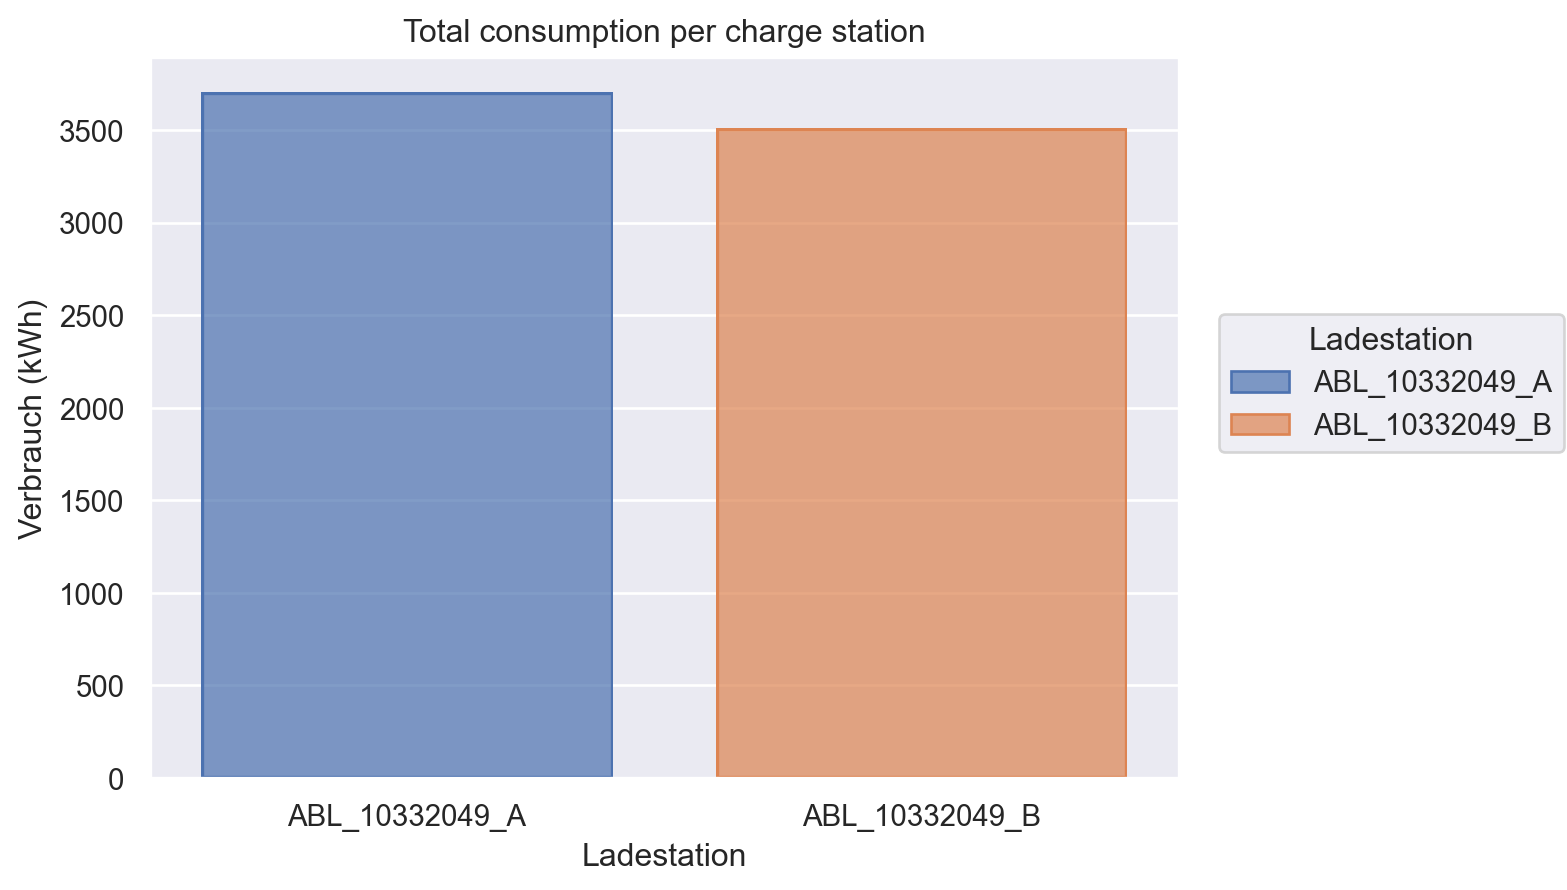

In [54]:
# Stack the consumption of each charge points
x = (
    so.Plot(user_data, x="Ladestation", y='Verbrauch (kWh)', color='Ladestation')
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Verbrauch (kWh)', title='Total consumption per charge station')
)

# Save figure
x.save('../Images/Public/Redo/consumption-per-charge-station')

### Consumption per charge point

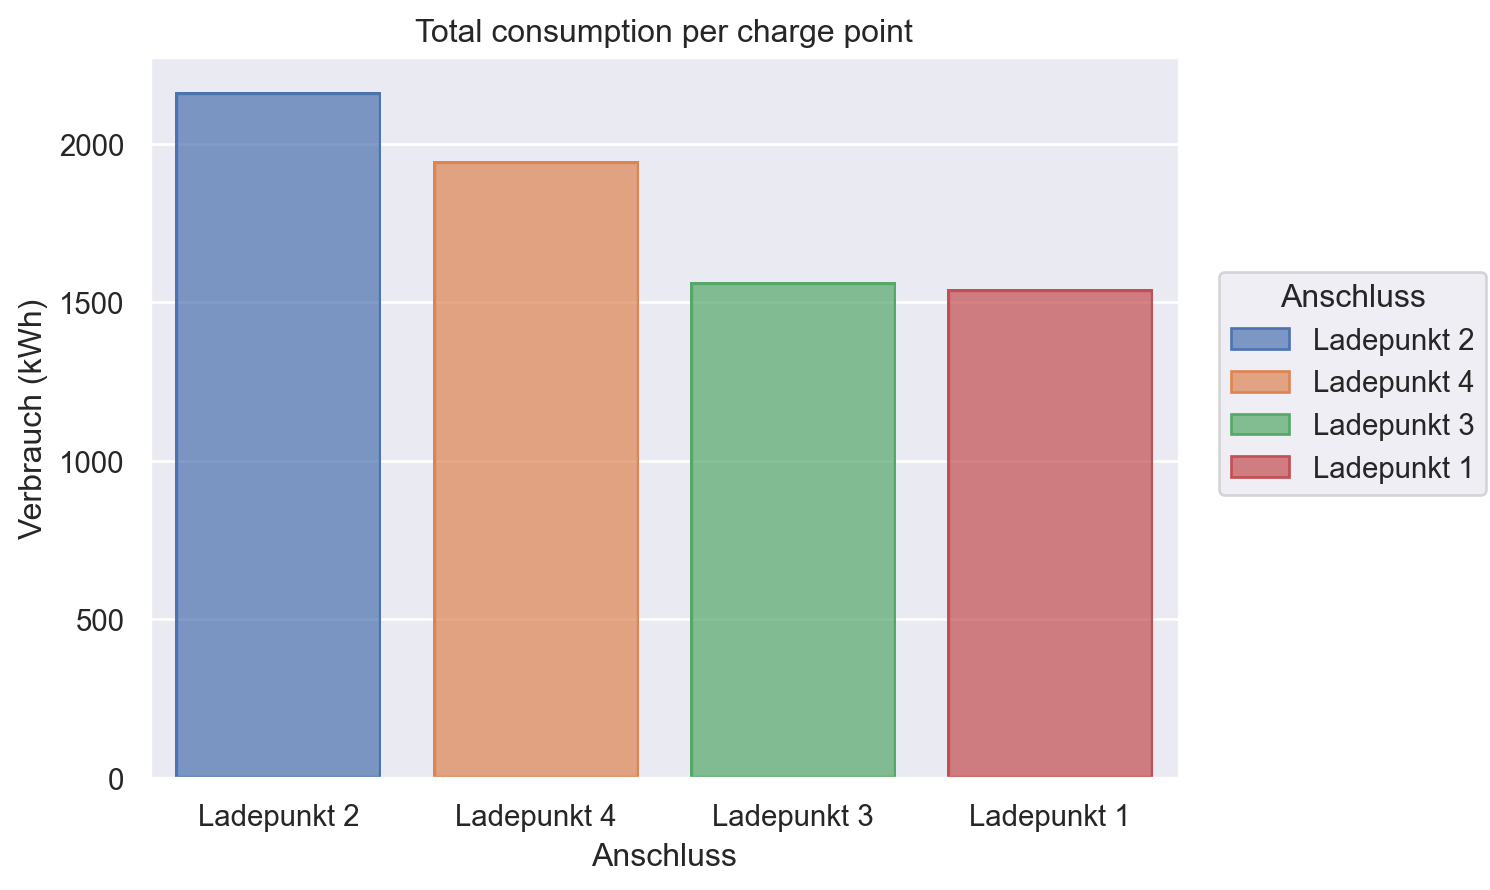

In [52]:
# Stack the consumption of each charge points
x = (
    so.Plot(user_data, x="Anschluss", y='Verbrauch (kWh)', color='Anschluss')
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Verbrauch (kWh)', title='Total consumption per charge point')
)

# Save figure
x.save('../Images/Public/Redo/consumption-per-charge-point')

In [55]:
user_data.groupby(['Standort', 'Ladestation'])['Verbrauch (kWh)'].sum()

Standort  Ladestation   
Ulanweg   ABL_10332049_A    3707.267
          ABL_10332049_B    3508.887
Name: Verbrauch (kWh), dtype: float64

### Connection time time per charge station

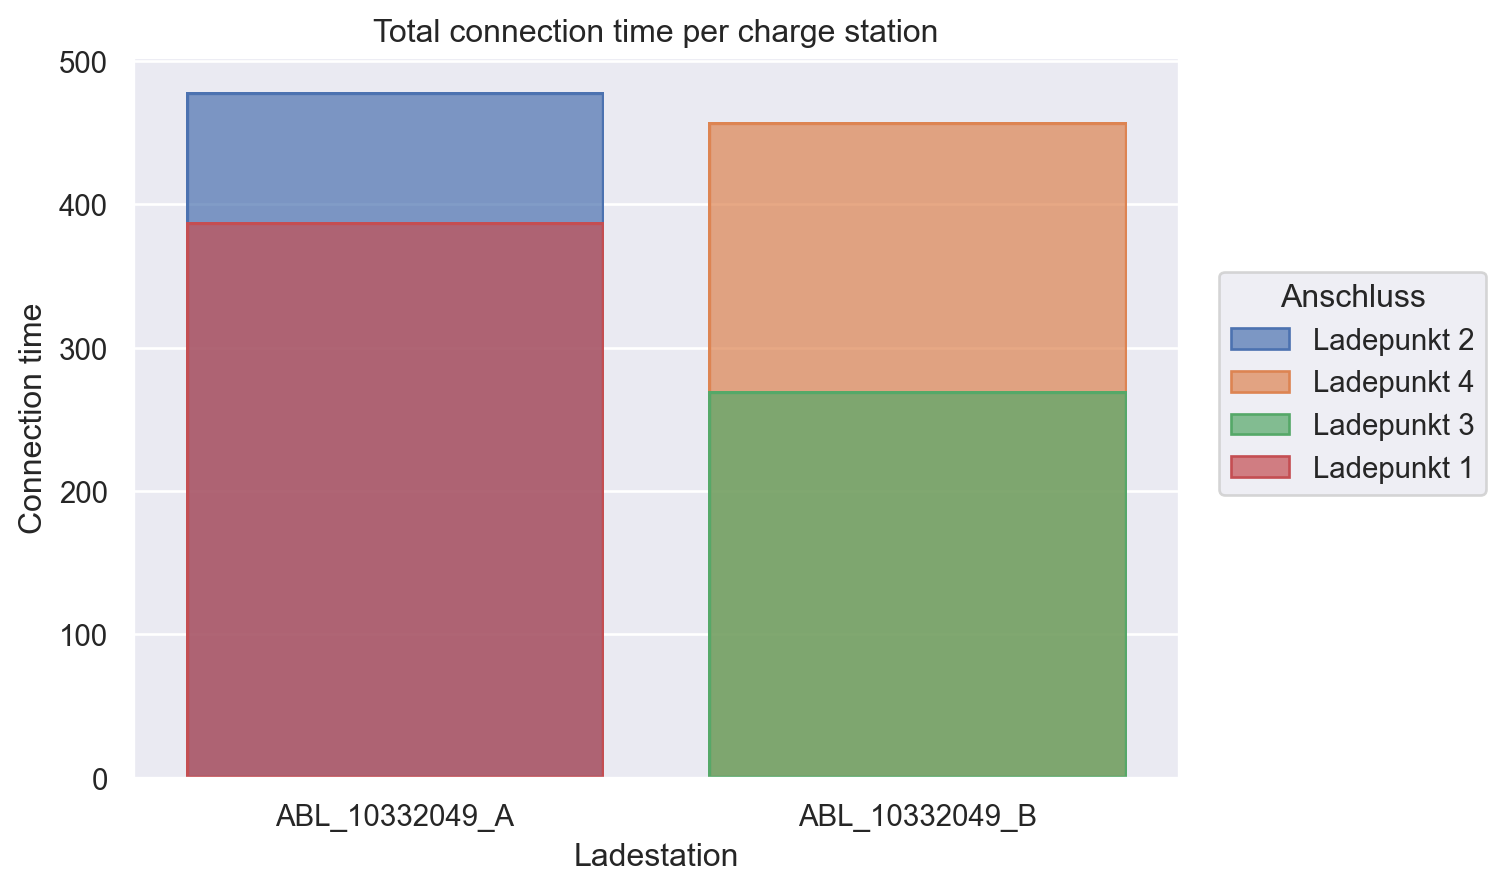

In [56]:
# Stack the connection time of each charge point per station
x = (
    so.Plot(user_data, x="Ladestation", y='Blocking time', color='Anschluss')
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Connection time', title='Total connection time per charge station')
)

# Save figure
x.save('../Images/Public/Redo/connection-time-per-charge-station')

In [42]:
user_data.groupby(['Standort', 'Ladestation'])['Blocking time'].sum()

Standort  Ladestation 
Ulanweg   ABL_10332049    1593.908333
Name: Blocking time, dtype: float64

### Charge time per charge station

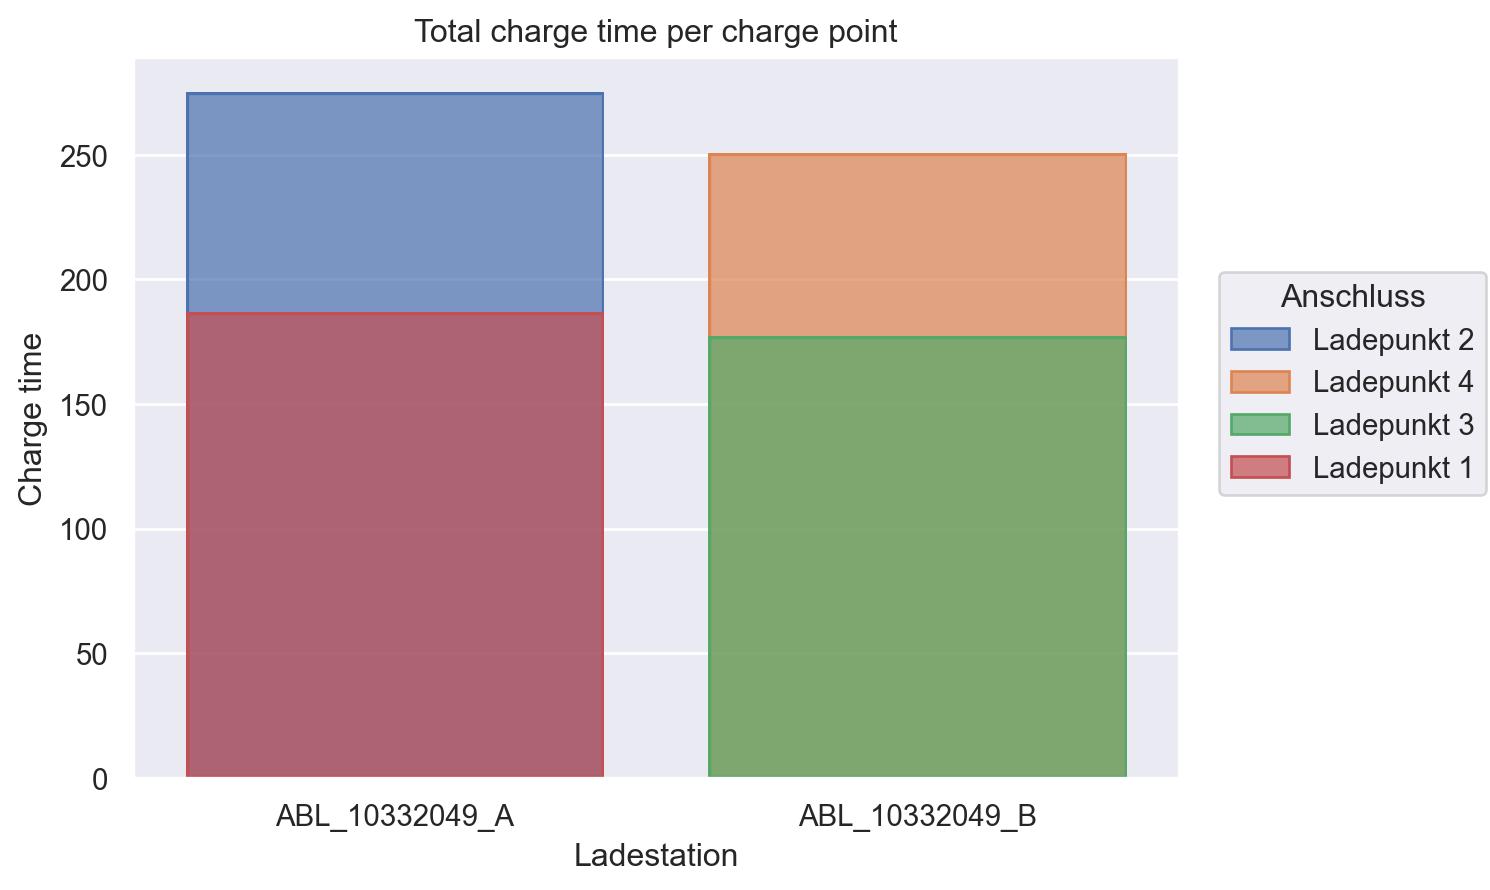

In [57]:
x = (
    so.Plot(user_data, x="Ladestation", y='Charge time', color='Anschluss')
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Charge time', title='Total charge time per charge point')
)
x.save('../Images/Public/Redo/charge-time-per-charge-point')

### Capacity utilization

In [58]:
# Create a pivot table that contains the total connection time in each month in the charge stations
user_data_blocking_time_sum = pd.pivot_table(user_data, values='Blocking time', columns=['Plugged_in_month'], index=['Ladestation'], aggfunc="sum")

In [59]:
user_data_blocking_time_sum

Plugged_in_month,September,October,November,December,January
Ladestation,,,,,
ABL_10332049_A,22.939167,181.893333,157.605556,246.198611,257.905278
ABL_10332049_B,134.383889,114.341389,138.912778,155.038333,184.690000


In [60]:
# Convert the pivot table to a long format
user_data_blocking_time_month = pd.melt(
    user_data_blocking_time_sum.reset_index(),
    id_vars=['Ladestation'],
    value_vars=['September', 'October', 'November', 'December', 'January'],
    var_name = 'Month',
    value_name = 'Blocking time'
)

In [62]:
user_data.groupby('Plugged_in_month')['Plugged_in_day'].nunique()

Plugged_in_month
September    19
October      27
November     27
December     28
January      29
Name: Plugged_in_day, dtype: int64

In [63]:
# Create a function that calculates capacity utilization for each month
def capacity_util(df):
    #months = df['Month'].values
    if df['Month'] == 9:
        capacity = (df['Blocking time'] / 456) * 100
    elif df['Month'] == 10:
        capacity = (df['Blocking time'] / 648) * 100
    elif df['Month'] == 11:
        capacity = (df['Blocking time'] / 648) * 100
    elif df['Month'] == 12:
        capacity = (df['Blocking time'] / 672) * 100
    else:
        capacity = (df['Blocking time'] / 696) * 100
    return capacity

In [64]:
# Create the capacity utilization column
user_data_blocking_time_month['Capacity utilization'] = user_data_blocking_time_month.apply(capacity_util, axis=1)

In [65]:
# Convert the months to a categorical variable in order to sort it
user_data_blocking_time_month['Month'] = pd.Categorical(
    user_data_blocking_time_month['Month'],
    categories=['September', 'October', 'November', 'December', 'January']
)

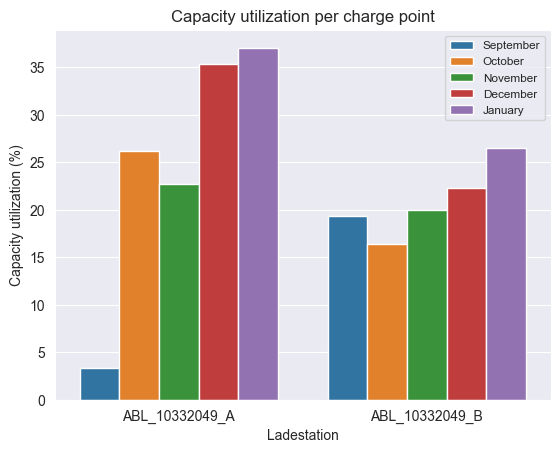

In [66]:
# Create a barplot of the capacity utilization of each month in each charge point
sns.barplot(
    data=user_data_blocking_time_month.sort_values('Capacity utilization'),
    x='Ladestation',
    y='Capacity utilization',
    hue='Month'
)
plt.ylabel('Capacity utilization (%)')
plt.title('Capacity utilization per charge point')
plt.legend(fontsize=8.5)
#plt.legend([9, 10, 11, 12, 1], labels=['September', 'October', 'November', 'December', 'January'])

# Save figure
plt.savefig('../Images/Public/Redo/capacity-utilization-per-charge-station')
plt.show()

In [68]:
user_data_blocking_time_month.groupby('Ladestation')['Capacity utilization'].mean()

Ladestation
ABL_10332049_A    24.900631
ABL_10332049_B    20.901333
Name: Capacity utilization, dtype: float64

### Daytime users

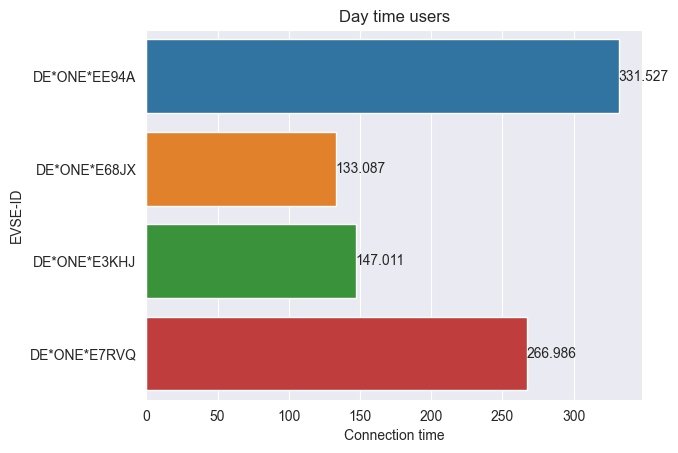

In [70]:
ax = sns.barplot(
    data=user_data_daytime,
    y='EVSE-ID',
    x='Blocking time',
    estimator='sum',
    ci=None
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Day time users')
plt.xlabel('Connection time')

# Save figure
plt.savefig('../Images/Public/Redo/day-time-users', bbox_inches='tight')
plt.show()

### Daytime and nighttime consumption

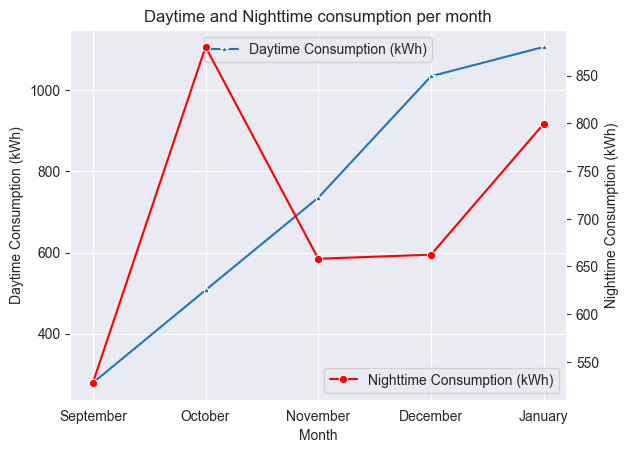

In [74]:
fig, ax = plt.subplots()

sns.lineplot(
    data=user_data_daytime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax,
    estimator='sum',
    ci=None,
    label='Daytime Consumption (kWh)',
    marker='*'
)
#ax.tick_params(axis='y', labelcolor='blue')
ax.set_xlabel('Month')
ax.set_ylabel('Daytime Consumption (kWh)')

ax2 = ax.twinx()
ax2.grid(False)

sns.lineplot(
    data=user_data_nighttime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax2,
    estimator='sum',
    ci=None,
    color='red',
    label='Nighttime Consumption (kWh)',
    marker='o'
)
#plt.xticks([9, 10, 11, 12, 1], labels=['September', 'October', 'November', 'December', 'January'])
#ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Nighttime Consumption (kWh)')
ax.legend(loc='upper center')
ax2.legend(loc='lower right')
# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2)
plt.title('Daytime and Nighttime consumption per month')

# Save figure
plt.savefig('../Images/Public/Redo/daytime-nighttime-consumption-per-month')
plt.show()

### Charge sessions per month

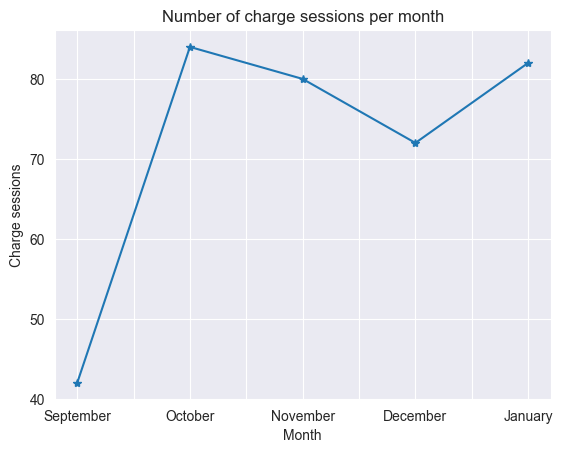

In [76]:
user_data.groupby('Plugged_in_month')['Charge time'].count().plot(kind='line', marker='*')
#plt.xticks([9,10,11], labels=['September', 'October', 'November'])
plt.xlabel('Month')
plt.ylabel('Charge sessions')
plt.title('Number of charge sessions per month')

# Save figure
plt.savefig('../Images/Public/Redo/charge-sessions-per-month')
plt.show()

### Charge sessions per point

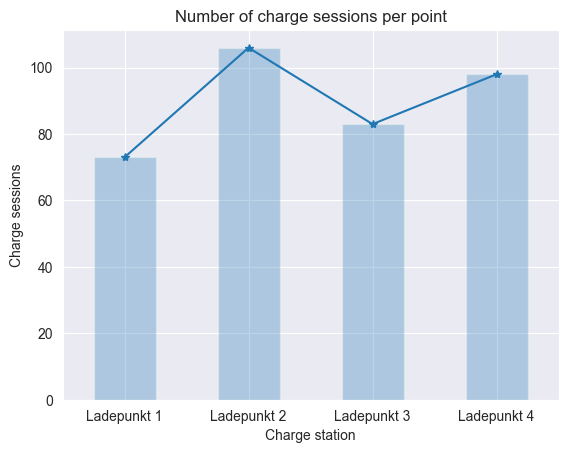

In [77]:
user_data.groupby('Anschluss')['Charge time'].count().plot(kind='bar', alpha=0.3)
user_data.groupby('Anschluss')['Charge time'].count().plot(kind='line', marker='*')
plt.xlabel('Charge station')
plt.ylabel('Charge sessions')
plt.xticks(rotation=0)
plt.title('Number of charge sessions per point')

# Save figure
plt.savefig('../Images/Public/Redo/charge-sessions-per-charge-point')
plt.show()

### Consumption per session per month

In [78]:
amount_of_consumption = user_data.groupby('Plugged_in_month')['Verbrauch (kWh)'].sum()
num_of_sessions = user_data.groupby('Plugged_in_month')['Charge time'].count()

user_data_kwh_per_session = (amount_of_consumption / num_of_sessions).reset_index()

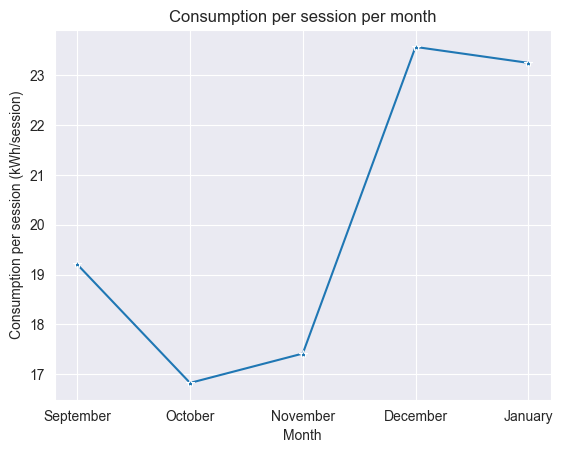

In [79]:
sns.lineplot(
    data=user_data_kwh_per_session,
    x='Plugged_in_month',
    y=0,
    marker='*'
)
plt.xlabel('Month')
plt.ylabel('Consumption per session (kWh/session)')
plt.title('Consumption per session per month')

# Save figure
plt.savefig('../Images/Public/Redo/consumption-per-session-per-month')
plt.show()

In [80]:
user_data_kwh_per_session[0].mean()

20.05148962156407

### Median connection time for each day in each month

In [59]:
# Create a pivot table that contains the median connection time for each day in each month
median_connection_time = pd.pivot_table(user_data, values='Blocking time', columns=['Plugged_in_dayname'], index=['Plugged_in_month'], aggfunc="median")
median_connection_time

Plugged_in_dayname,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Plugged_in_month,,,,,,,
September,3.543333,12.576944,1.776389,2.491389,3.644722,2.147500,2.616806
October,2.461667,3.313889,2.835000,2.213611,3.342361,1.647083,2.571667
November,3.440556,3.821389,3.011250,3.703889,6.835694,1.652500,2.531250
December,2.873611,3.632222,2.148056,4.291389,3.595556,2.320278,3.083472
January,4.949444,3.062917,2.792778,4.238611,2.739028,3.575000,3.301389


### Median energy consumption for each day in each month

In [60]:
# Create a pivot table that contains the total median consumption for each day in each month
median_energy = pd.pivot_table(user_data, values='Verbrauch (kWh)', columns=['Plugged_in_dayname'], index=['Plugged_in_month'], aggfunc="median")
median_energy

Plugged_in_dayname,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Plugged_in_month,,,,,,,
September,37.3320,16.400,15.273,24.9740,10.8240,10.293,10.1325
October,10.8010,10.641,10.098,17.9760,11.1420,11.114,11.0015
November,13.6890,15.801,13.254,9.9995,12.4265,8.659,12.1325
December,26.1545,13.674,18.171,14.8350,30.9280,12.095,19.6125
January,28.7420,20.344,18.083,15.5040,15.7660,15.443,12.6645


### Average connection and charge time per month

In [62]:
# Create a pivot table that contains the median connection and charge times for each day in each month
avg_connection_time = pd.pivot_table(user_data, values=['Blocking time', 'Charge time'], index=['Plugged_in_month'], aggfunc="mean")
avg_connection_time

,Blocking time,Charge time
Plugged_in_month,,
September,3.745787,2.227652
October,3.526604,2.290807
November,3.706479,2.476385
December,5.572735,2.610313
January,5.397503,2.660528


In [69]:
user_data.groupby('Anschluss')['']

Standort  Ladestation   Anschluss  
Ulanweg   ABL_10332049  Ladepunkt 1    1543.049
                        Ladepunkt 2    2164.218
                        Ladepunkt 3    1563.233
                        Ladepunkt 4    1945.654
Name: Verbrauch (kWh), dtype: float64

# Excesses

In [18]:
user_data_copy = user_data.copy()
user_data_copy['Plugged_in_month'] = user_data_copy['Plugged_in_month'].map({
    9: 'September',
    10: 'October',
    11: 'November'
})

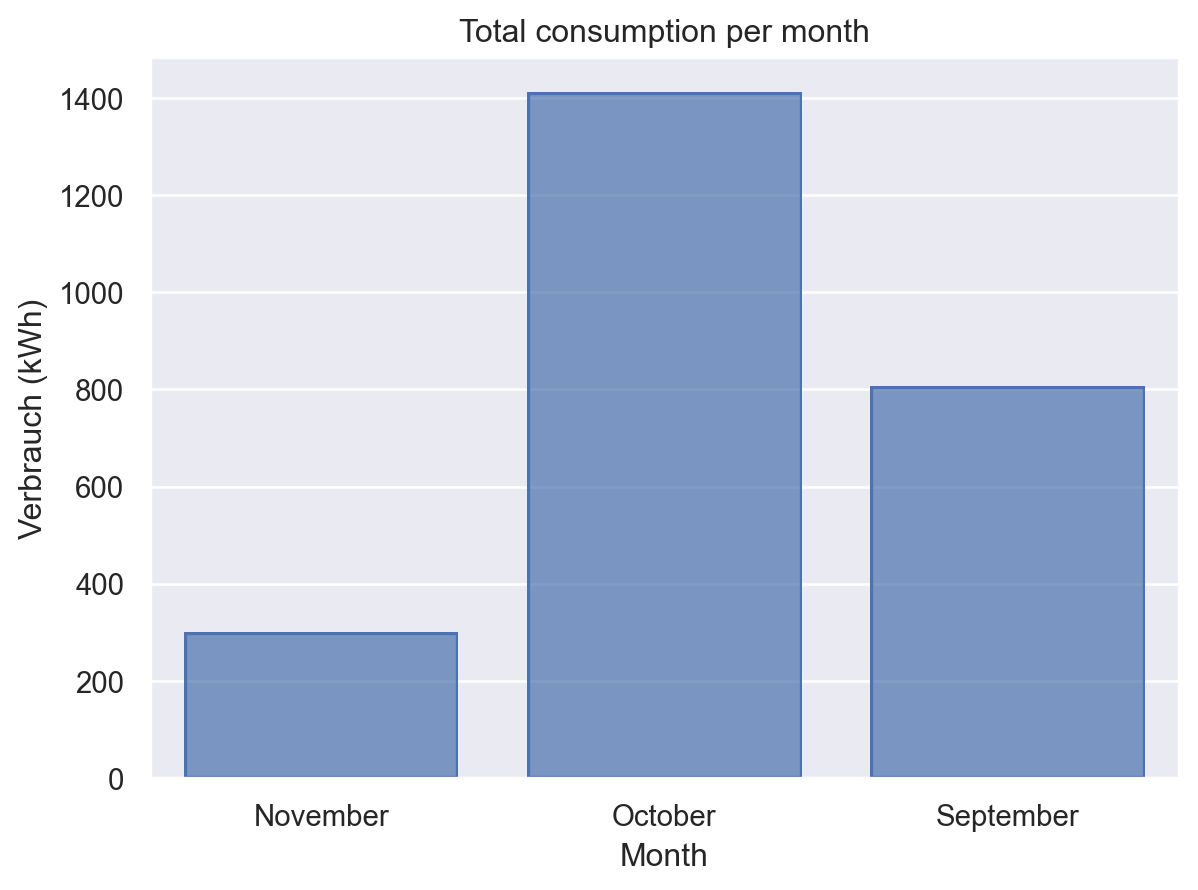

In [70]:
x = (
    so.Plot(user_data_copy, x="Plugged_in_month", y='Verbrauch (kWh)')
    .add(so.Bar(), so.Agg('sum'), so.Stack())
    .label(y='Verbrauch (kWh)', x='Month', title='Total consumption per month')
)
x.save('../Images/Public/Redo/consumption-per-month')

In [21]:
user_data.groupby(['Plugged_in_month'])['Verbrauch (kWh)'].sum()

Plugged_in_month
9      806.527
10    1413.450
11     299.619
Name: Verbrauch (kWh), dtype: float64

Only 7 days were recorded in November. This is why the consumption is much lower compared to other months.

In [22]:
user_data['Anschluss'] = user_data['Anschluss'].map({
    '1': 'Ladepunkt 1',
    'Ladepunkt 1': 'Ladepunkt 1',
    '2': 'Ladepunkt 2',
    'Ladepunkt 2': 'Ladepunkt 2',
    '3': 'Ladepunkt 3',
    'Ladepunkt 3': 'Ladepunkt 3',
    '4': 'Ladepunkt 4',
    'Ladepunkt 4': 'Ladepunkt 4'
})

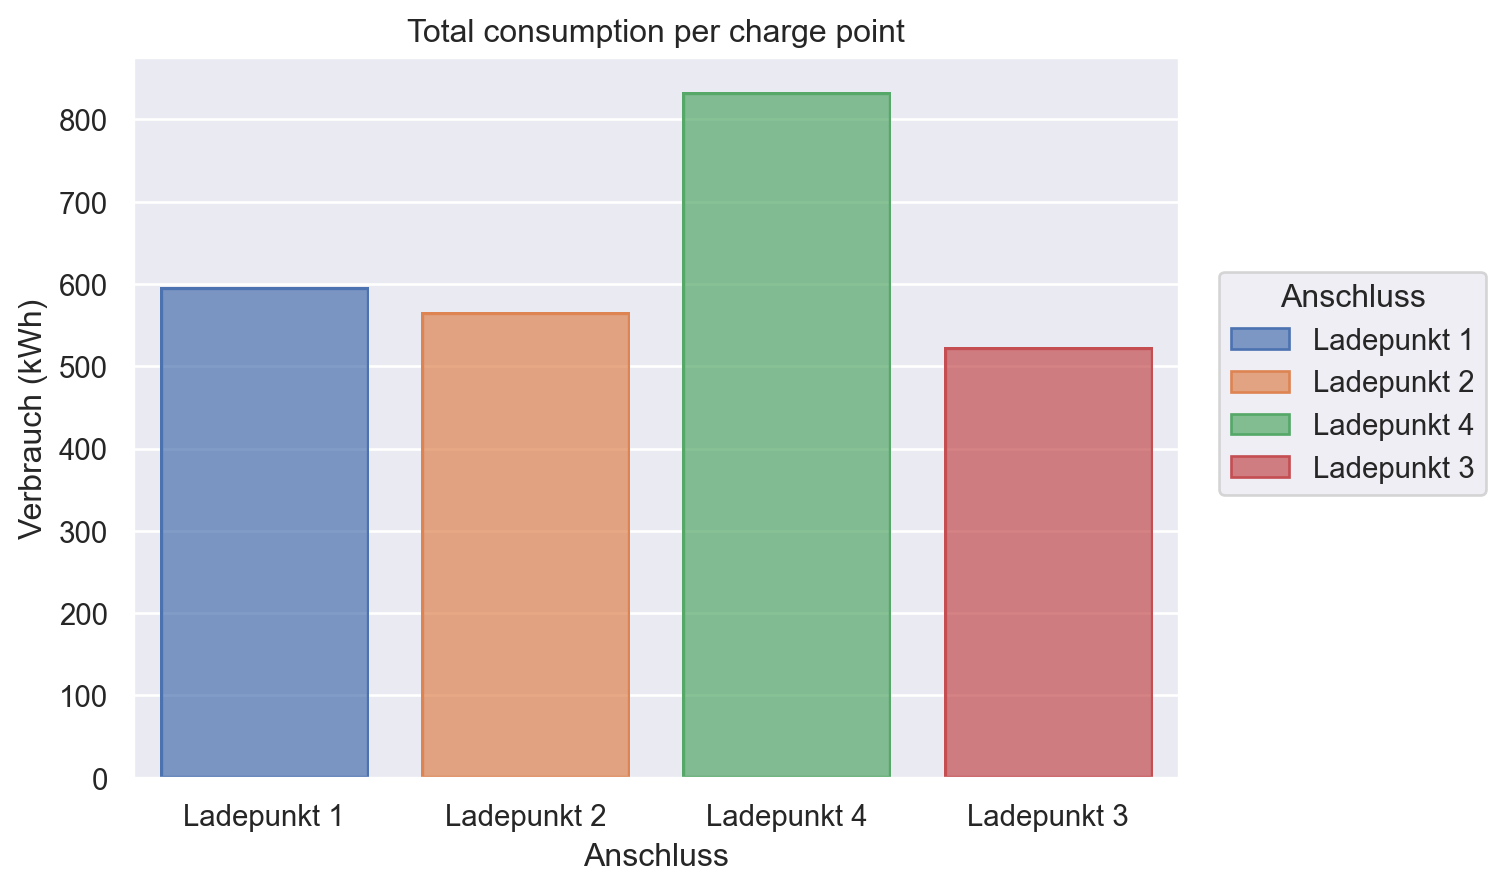

In [81]:
x = (
    so.Plot(user_data, x="Anschluss", y='Verbrauch (kWh)', color="Anschluss")
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Verbrauch (kWh)', title='Total consumption per charge point')
)
x.save('../Images/Public/Redo/consumption-per-charge-point')

In [25]:
user_data.groupby(['Standort', 'Ladestation'])['Verbrauch (kWh)'].sum()

Standort  Ladestation 
Ulanweg   ABL_10332049    2519.596
Name: Verbrauch (kWh), dtype: float64

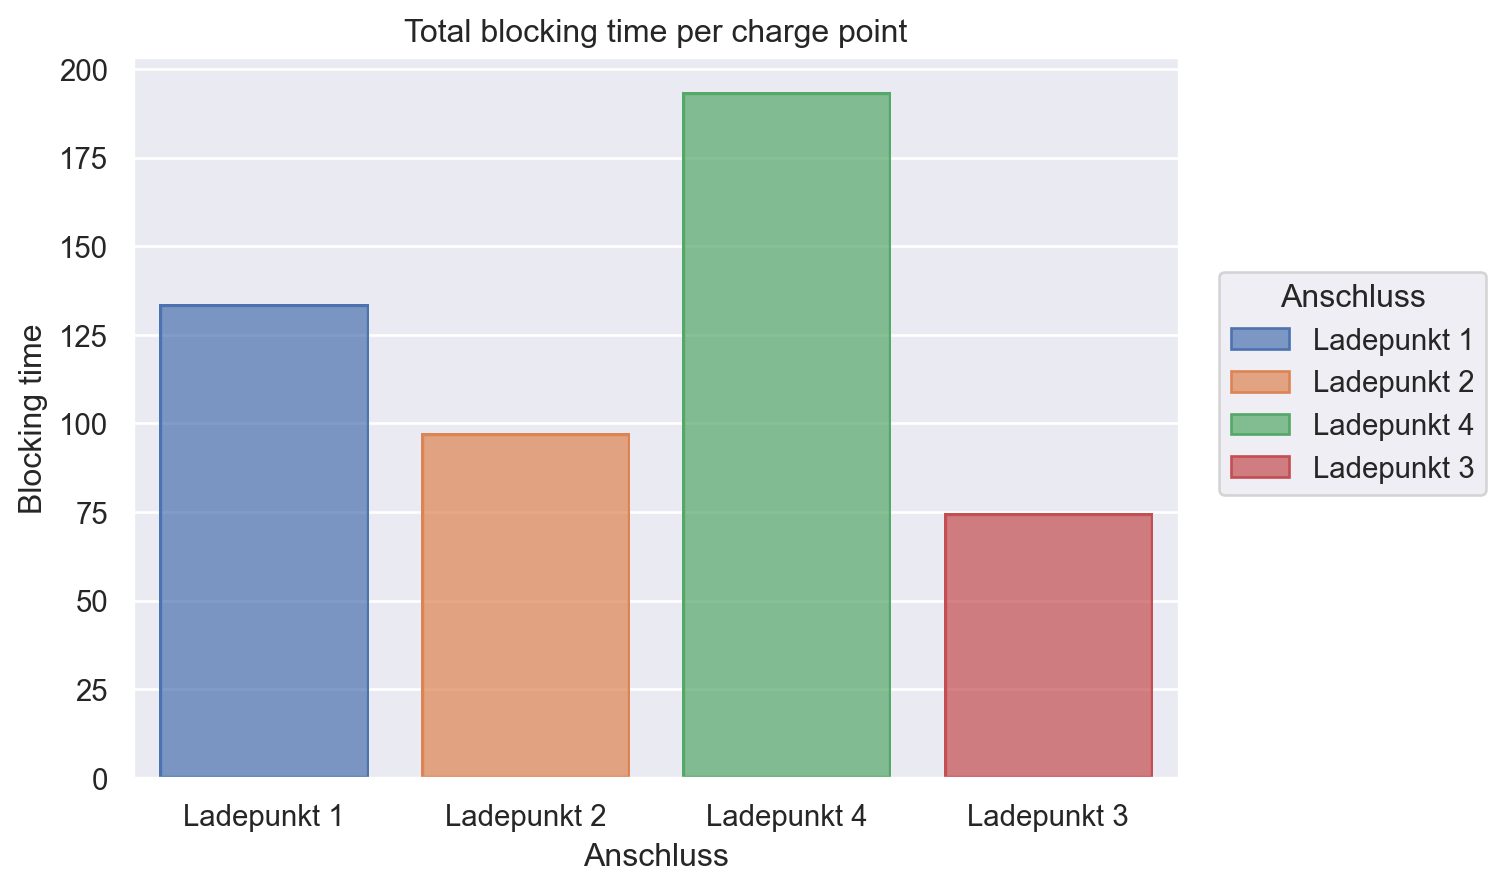

In [82]:
x = (
    so.Plot(user_data, x="Anschluss", y='Blocking time', color="Anschluss")
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Blocking time', title='Total blocking time per charge point')
)
x.save('../Images/Public/Redo/blocking-time-per-charge-point')

In [27]:
user_data.groupby(['Standort', 'Ladestation'])['Blocking time'].sum()

Standort  Ladestation 
Ulanweg   ABL_10332049    499.101944
Name: Blocking time, dtype: float64

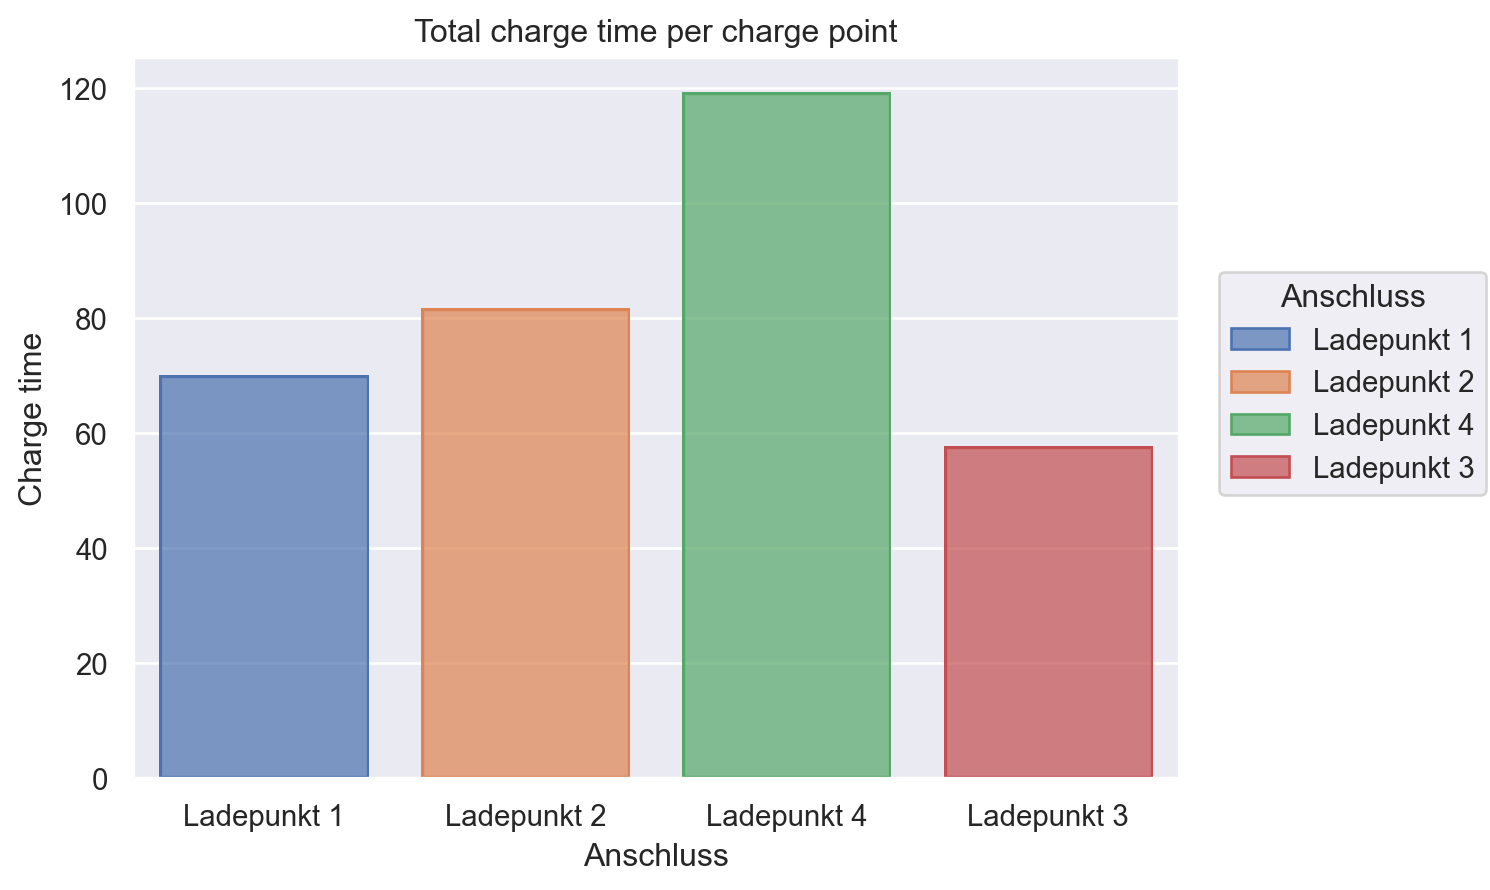

In [83]:
x = (
    so.Plot(user_data, x="Anschluss", y='Charge time', color="Anschluss")
    .add(so.Bar(), so.Agg('sum'))
    .label(y='Charge time', title='Total charge time per charge point')
)
x.save('../Images/Public/Redo/charge-time-per-charge-point')

In [93]:
user_data_blocking_time_sum = pd.pivot_table(user_data, values='Blocking time', columns=['Plugged_in_month'], index=['Anschluss'], aggfunc="sum")

In [94]:
user_data_blocking_time_month = pd.melt(
    user_data_blocking_time_sum.reset_index(),
    id_vars=['Anschluss'],
    value_vars=[9, 10, 11],
    var_name = 'Month',
    value_name = 'Blocking time'
)

In [69]:
#user_data.groupby('Plugged_in_month')['Plugged_in_day'].nunique()

In [95]:
def capacity_util(df):
    #months = df['Month'].values
    if df['Month'] == 9:
        capacity = df['Blocking time'] / 456
    elif df['Month'] == 10:
        capacity = df['Blocking time'] / 648
    else:
        capacity = df['Blocking time'] / 120
    return capacity

In [96]:
user_data_blocking_time_month['Capacity utilization'] = user_data_blocking_time_month.apply(capacity_util, axis=1)

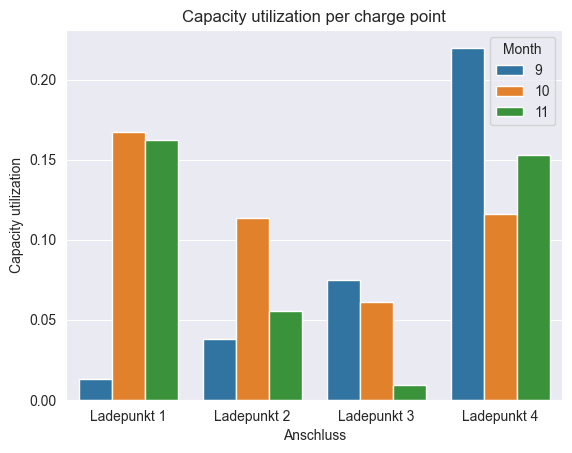

In [100]:
sns.barplot(
    data=user_data_blocking_time_month,
    x='Anschluss',
    y='Capacity utilization',
    hue='Month'
)
plt.title('Capacity utilization per charge point')
plt.savefig('../Images/Public/Redo/capacity-utilization-per-charge-point')
plt.show()

In [99]:
user_data_blocking_time_month.groupby('Anschluss')['Capacity utilization'].mean()

Anschluss
Ladepunkt 1    0.114134
Ladepunkt 2    0.068720
Ladepunkt 3    0.048257
Ladepunkt 4    0.162786
Name: Capacity utilization, dtype: float64

In [37]:
user_data_blocking_time_month.groupby('Ladestation')['Capacity utilization'].mean()

Ladestation
ABL_10332049    0.295922
Name: Capacity utilization, dtype: float64

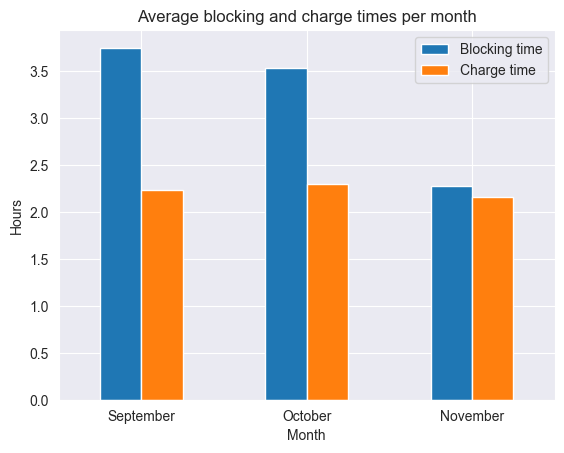

In [38]:
ax = user_data.groupby('Plugged_in_month')[['Blocking time', 'Charge time']].mean().plot(kind='bar')
ax.set_xticklabels(['September', 'October', 'November'])
plt.xlabel('Month')
plt.ylabel('Hours')
plt.xticks(rotation=0)
plt.title('Average blocking and charge times per month')
plt.savefig('../Images/Public/Redo/average-blocking-charge-time-per-month')
plt.show()

In [102]:
user_data['Charge time'].mean()

2.25402397260274

In [103]:
user_data.groupby('Anschluss')['EVSE-ID'].unique()

Anschluss
Ladepunkt 1    [DE*ONE*E7RVQ]
Ladepunkt 2    [DE*ONE*E3KHJ]
Ladepunkt 3    [DE*ONE*E68JX]
Ladepunkt 4    [DE*ONE*EE94A]
Name: EVSE-ID, dtype: object

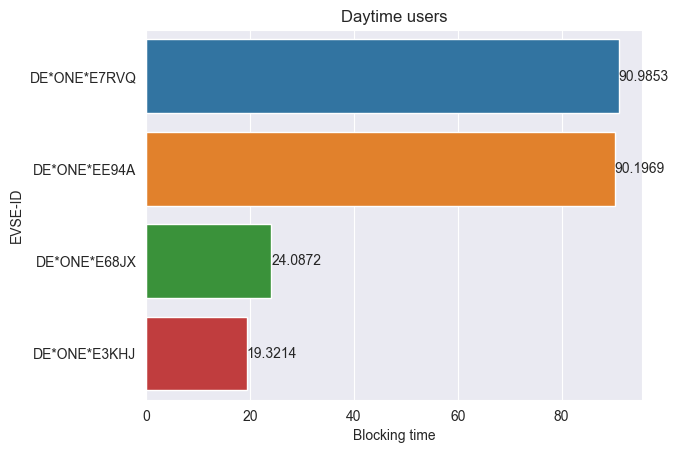

In [104]:
ax = sns.barplot(
    data=user_data_daytime,
    y='EVSE-ID',
    x='Blocking time',
    estimator='sum',
    ci=None
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Daytime users')
plt.savefig('../Images/Public/Redo/daytime-users', bbox_inches='tight')
plt.show()

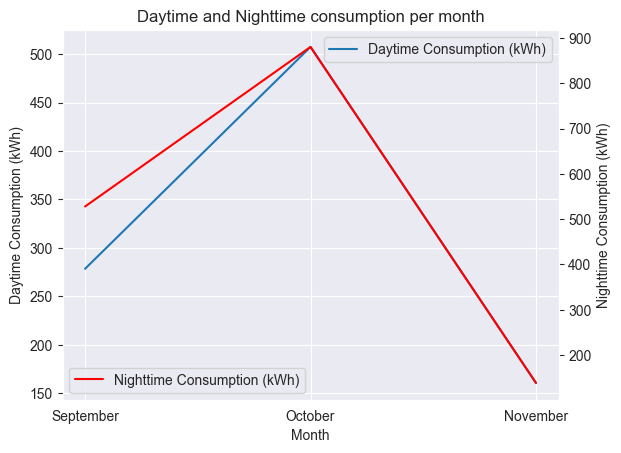

In [42]:
fig, ax = plt.subplots()

sns.lineplot(
    data=user_data_daytime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax,
    estimator='sum',
    ci=None,
    label='Daytime Consumption (kWh)'
)
#ax.tick_params(axis='y', labelcolor='blue')
ax.set_xlabel('Month')
ax.set_ylabel('Daytime Consumption (kWh)')

ax2 = ax.twinx()
ax2.grid(False)

sns.lineplot(
    data=user_data_nighttime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax2,
    estimator='sum',
    ci=None,
    color='red',
    label='Nighttime Consumption (kWh)'
)
plt.xticks([9, 10, 11], labels=['September', 'October', 'November'])
#ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Nighttime Consumption (kWh)')
# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2)
plt.title('Daytime and Nighttime consumption per month')
plt.savefig('../Images/Public/Redo/daytime-nighttime-consumption-per-month')
plt.show()

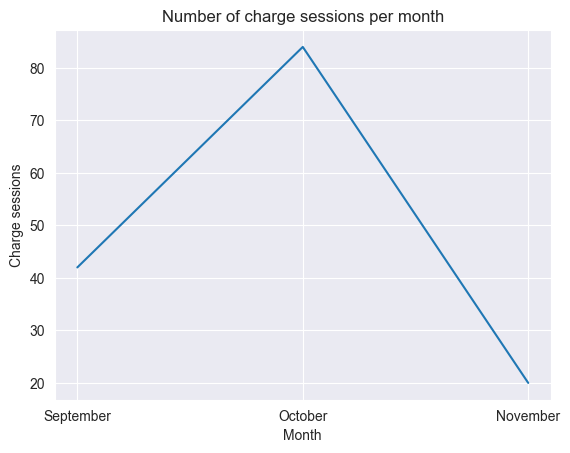

In [44]:
user_data.groupby('Plugged_in_month')['Charge time'].count().plot(kind='line')
plt.xticks([9,10,11], labels=['September', 'October', 'November'])
plt.xlabel('Month')
plt.ylabel('Charge sessions')
plt.title('Number of charge sessions per month')
plt.savefig('../Images/Public/Redo/charge-sessions-per-month')
plt.show()

In [45]:
user_data_daytime.groupby('Plugged_in_month')['Verbrauch (kWh)'].sum()

Plugged_in_month
9     278.568
10    507.301
11    160.891
Name: Verbrauch (kWh), dtype: float64

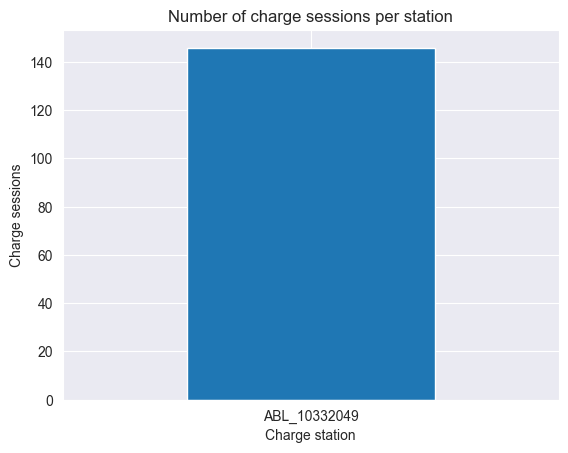

In [51]:
user_data.groupby('Ladestation')['Charge time'].count().plot(kind='bar')
#user_data.groupby('Ladestation')['Charge time'].count().plot(kind='line')
plt.xlabel('Charge station')
plt.ylabel('Charge sessions')
plt.xticks(rotation=0)
plt.title('Number of charge sessions per station')
plt.savefig('../Images/Public/Redo/charge-sessions-per-station')
plt.show()

In [53]:
user_data['Blocking time'].sum()

499.1019444444445

In [56]:
amount_of_consumption = user_data.groupby('Plugged_in_month')['Verbrauch (kWh)'].sum()
num_of_sessions = user_data.groupby('Plugged_in_month')['Charge time'].count()

user_data_kwh_per_session = (amount_of_consumption / num_of_sessions).reset_index()

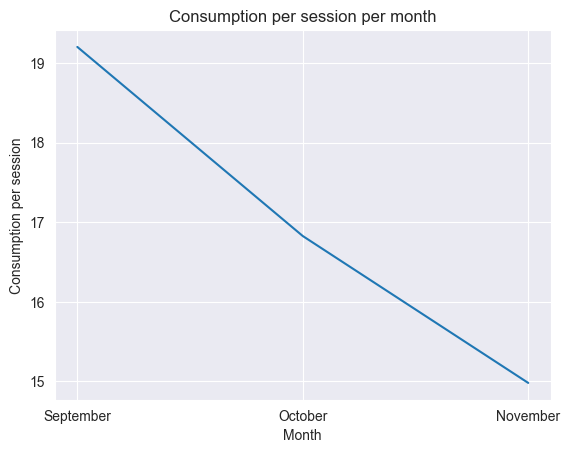

In [57]:
sns.lineplot(
    data=user_data_kwh_per_session,
    x='Plugged_in_month',
    y=0
)
plt.xticks([9, 10, 11], labels=['September', 'October', 'November'])
plt.xlabel('Month')
plt.ylabel('Consumption per session')
plt.title('Consumption per session per month')
plt.savefig('../Images/Public/Redo/consumption-per-session-per-month')
plt.show()

In [123]:
user_data_kwh_per_session[0].mean()

17.003586507936507

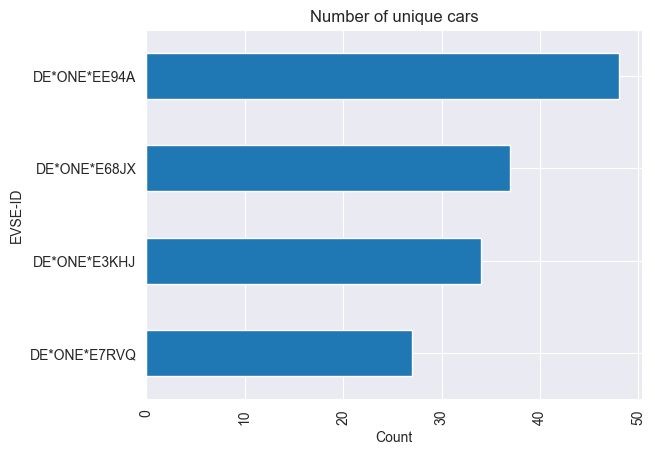

In [100]:
user_data['EVSE-ID'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.title('Number of unique cars')
plt.savefig('Images/Public/unique-public-users.png', dpi=300, bbox_inches='tight')
plt.show()

### Rate/frequency of charge per user

<Axes: xlabel='Plugged_in_hour', ylabel='Charge time'>

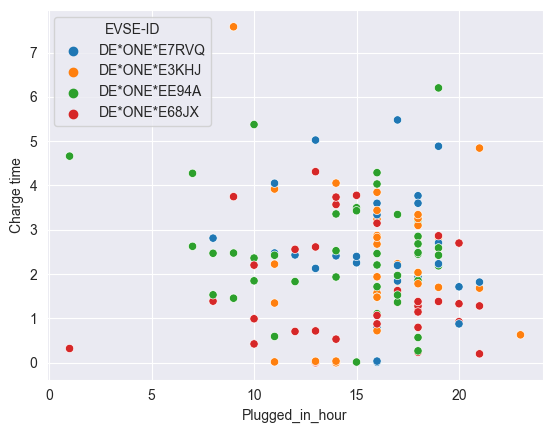

In [105]:
sns.scatterplot(
    data=user_data,
    x='Plugged_in_hour',
    y='Charge time',
    hue='EVSE-ID',
 )

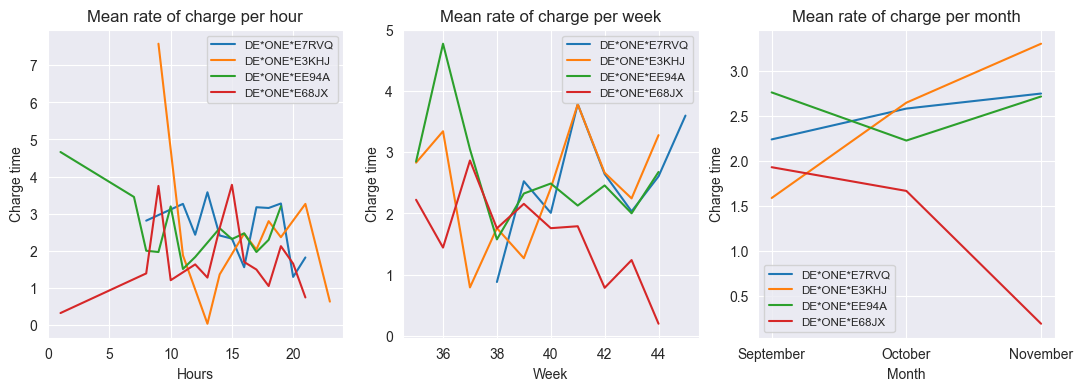

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
# Rate of charge (hourly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_hour',
    y='Charge time',
    hue='EVSE-ID',
    ci=None,
    ax=ax[0]
)
ax[0].legend(fontsize='small')
ax[0].set_title('Mean rate of charge per hour')
ax[0].set_xlabel('Hours')

# Rate of charge (weekly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_week',
    y='Charge time',
    hue='EVSE-ID',
    ci=None,
    ax=ax[1]
)
ax[1].set_title('Mean rate of charge per week')
ax[1].set_xlabel('Week')
ax[1].legend(fontsize='small')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_month',
    y='Charge time',
    hue='EVSE-ID',
    ci=None,
    ax=ax[2]
)
ax[2].set_title('Mean rate of charge per month')
ax[2].set_xlabel('Month')
ax[2].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
plt.legend(fontsize='small')
plt.savefig('Images/Public/rate-of-charge-of-users')
plt.show()

In [109]:
user_data_weekend = user_data[user_data['Eingesteckt am'].dt.day_name().isin(['Saturday', 'Sunday'])]
user_data_weekend['Weekend'] = user_data['Eingesteckt am'].dt.day_name()

In [110]:
user_data_weekend['Weekend'] = user_data_weekend['Weekend'].map({
    'Saturday': 6,
    'Sunday': 7
})

In [23]:
#user_data_weekend[['EVSE-ID', 'Weekend', 'Eingesteckt am', 'Ausgesteckt am', 'Zeit angesteckt', 'Ladedauer', 'Standort', 'Ladestation', 'Charge time']]

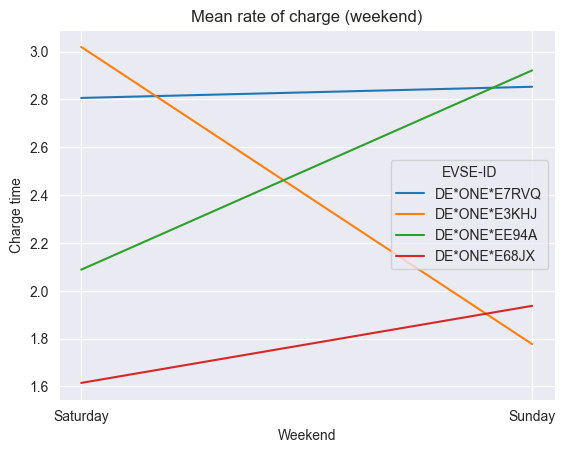

In [111]:
# Rate of charge (weekend)
sns.lineplot(
    data=user_data_weekend,
    x='Weekend',
    y='Charge time',
    hue='EVSE-ID',
    ci=None
)
plt.title('Mean rate of charge (weekend)')
plt.xlabel('Weekend')
plt.xticks([6, 7], labels=['Saturday', 'Sunday'])
plt.savefig('Images/Public/rate-of-charge-of-users-weekend')
plt.show()

### Rate of charge over the weekend

In [105]:
user_data_weekend = user_data[user_data['Eingesteckt am'].dt.day_name().isin(['Saturday', 'Sunday'])]
user_data_weekend['Weekend'] = user_data['Eingesteckt am'].dt.day_name()

In [106]:
user_data_weekend['Weekend'] = user_data_weekend['Weekend'].map({
    'Saturday': 6,
    'Sunday': 7
})

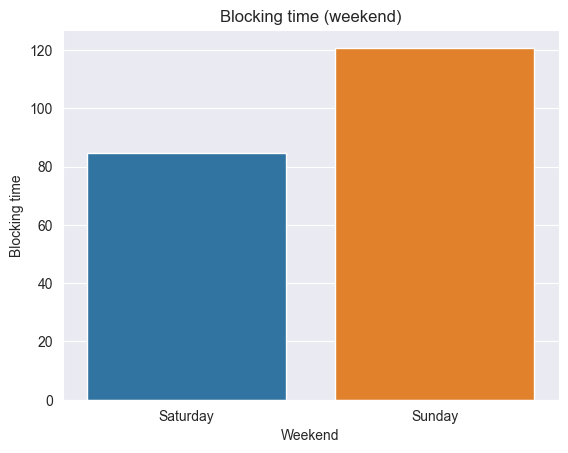

In [115]:
# Rate of charge (weekend)
ax = sns.barplot(
    data=user_data_weekend,
    x='Weekend',
    y='Blocking time',
    ci=None,
    estimator='sum'
)
plt.title('Blocking time (weekend)')
plt.xlabel('Weekend')
ax.set_xticklabels(['Saturday', 'Sunday'])
plt.savefig('../Images/Public/Redo/blocking-time-weekend')
plt.show()

### Usage occupancy of charge points

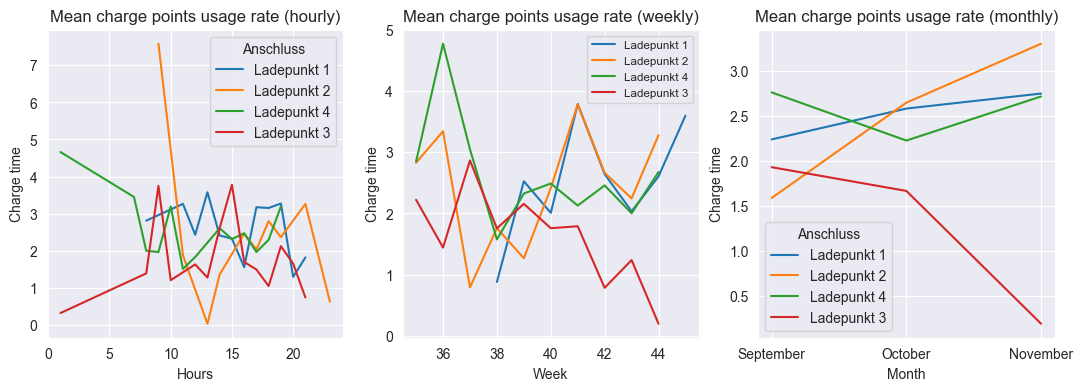

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
# Rate of charge (hourly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_hour',
    y='Charge time',
    hue='Anschluss',
    ci=None,
    ax=ax[0]
)
ax[0].set_title('Mean charge points usage rate (hourly)')
ax[0].set_xlabel('Hours')

# Rate of charge (weekly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_week',
    y='Charge time',
    hue='Anschluss',
    ci=None,
    ax=ax[1]
)
ax[1].set_title('Mean charge points usage rate (weekly)')
ax[1].set_xlabel('Week')
ax[1].legend(fontsize='small', loc='upper right')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_month',
    y='Charge time',
    hue='Anschluss',
    ci=None,
    ax=ax[2]
)
ax[2].set_title('Mean charge points usage rate (monthly)')
ax[2].set_xlabel('Month')
ax[2].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
plt.savefig('Images/Public/usage-occupancy-of-charge-points')
plt.show()

### Blocking time

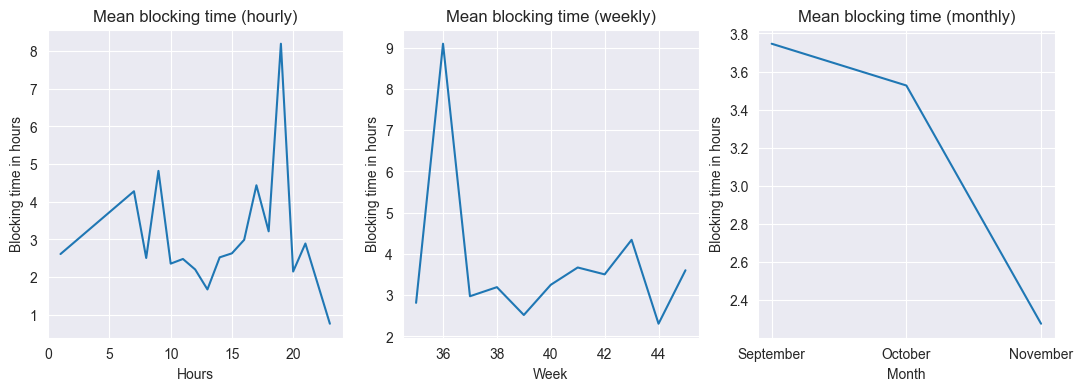

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
# Rate of charge (hourly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_hour',
    y='Blocking time',
    ci=None,
    ax=ax[0]
)
ax[0].set_title('Mean blocking time (hourly)')
ax[0].set_ylabel('Blocking time in hours')
ax[0].set_xlabel('Hours')

# Rate of charge (weekly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_week',
    y='Blocking time',
    ci=None,
    ax=ax[1]
)
ax[1].set_title('Mean blocking time (weekly)')
ax[1].set_xlabel('Week')
ax[1].set_ylabel('Blocking time in hours')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_month',
    y='Blocking time',
    ci=None,
    ax=ax[2]
)
ax[2].set_title('Mean blocking time (monthly)')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Blocking time in hours')
ax[2].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
plt.savefig('Images/Public/blocking-time')
plt.show()

### Hogging time

In [115]:
user_data['Hogging time'] = user_data['Blocking time'] - user_data['Charge time']

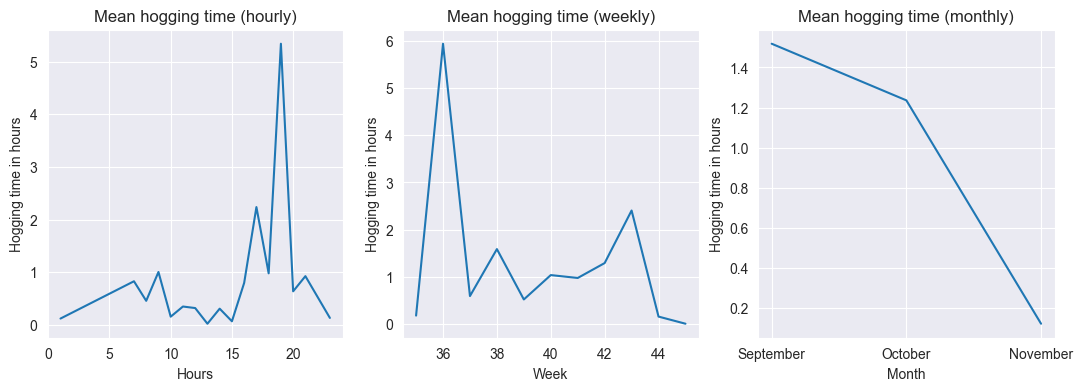

In [121]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))
# Rate of charge (hourly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_hour',
    y='Hogging time',
    ci=None,
    ax=ax[0]
)
ax[0].set_title('Mean hogging time (hourly)')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Hogging time in hours')

# Rate of charge (weekly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_week',
    y='Hogging time',
    ci=None,
    ax=ax[1]
)
ax[1].set_title('Mean hogging time (weekly)')
ax[1].set_xlabel('Week')
ax[1].set_ylabel('Hogging time in hours')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data,
    x='Plugged_in_month',
    y='Hogging time',
    ci=None,
    ax=ax[2]
)
ax[2].set_title('Mean hogging time (monthly)')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Hogging time in hours')
ax[2].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
plt.savefig('Images/Public/hogging-time')
plt.show()

### Day-time demand profile

In [122]:
user_data_daytime_weekend = user_data_daytime[user_data_daytime['Eingesteckt am'].dt.day_name().isin(['Saturday', 'Sunday'])]
user_data_daytime_weekend['Weekend'] = user_data_daytime['Eingesteckt am'].dt.day_name()

In [124]:
user_data_daytime_weekend['Weekend'] = user_data_daytime_weekend['Weekend'].map({
    'Saturday': 6,
    'Sunday': 7
})

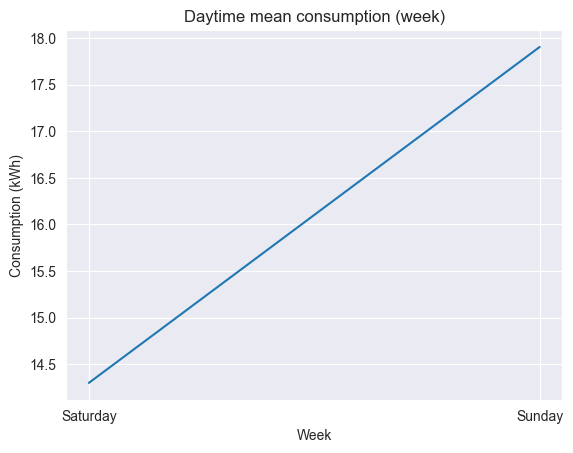

In [125]:
sns.lineplot(
    data=user_data_daytime_weekend,
    x='Weekend',
    y='Verbrauch (kWh)',
    ci=None
)
plt.xlabel('Week')
plt.ylabel('Consumption (kWh)')
plt.title('Daytime mean consumption (week)')
plt.xticks([6, 7], labels=['Saturday', 'Sunday'])
plt.savefig('Images/Public/daytime-demand-profile-weekend')
plt.show()

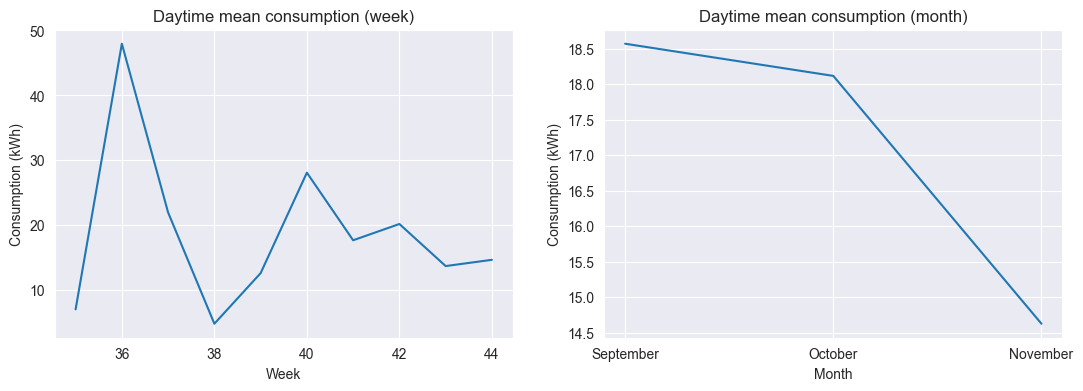

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

# Rate of charge (weekly)
sns.lineplot(
    data=user_data_daytime,
    x='Plugged_in_week',
    y='Verbrauch (kWh)',
    ax=ax[0],
    ci=None
)
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Consumption (kWh)')
ax[0].set_title('Daytime mean consumption (week)')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data_daytime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax[1],
    ci=None
)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Consumption (kWh)')
ax[1].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
ax[1].set_title('Daytime mean consumption (month)')
plt.savefig('Images/Public/daytime-demand-profile')
plt.show()

### Nighttime demand profile

In [126]:
user_data_nighttime_weekend = user_data_nighttime[user_data_nighttime['Eingesteckt am'].dt.day_name().isin(['Saturday', 'Sunday'])]
user_data_nighttime_weekend['Weekend'] = user_data_nighttime['Eingesteckt am'].dt.day_name()

In [127]:
user_data_nighttime_weekend['Weekend'] = user_data_nighttime_weekend['Weekend'].map({
    'Saturday': 6,
    'Sunday': 7
})

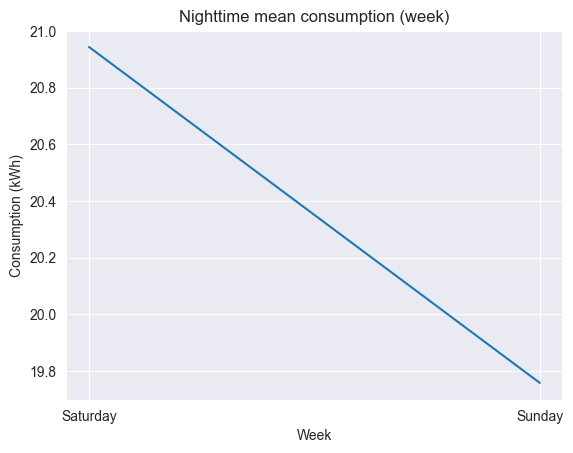

In [129]:
sns.lineplot(
    data=user_data_nighttime_weekend,
    x='Weekend',
    y='Verbrauch (kWh)',
    ci=None
)
plt.xlabel('Week')
plt.ylabel('Consumption (kWh)')
plt.title('Nighttime mean consumption (week)')
plt.xticks([6, 7], labels=['Saturday', 'Sunday'])
plt.savefig('Images/Public/nighttime-demand-profile-weekend')
plt.show()

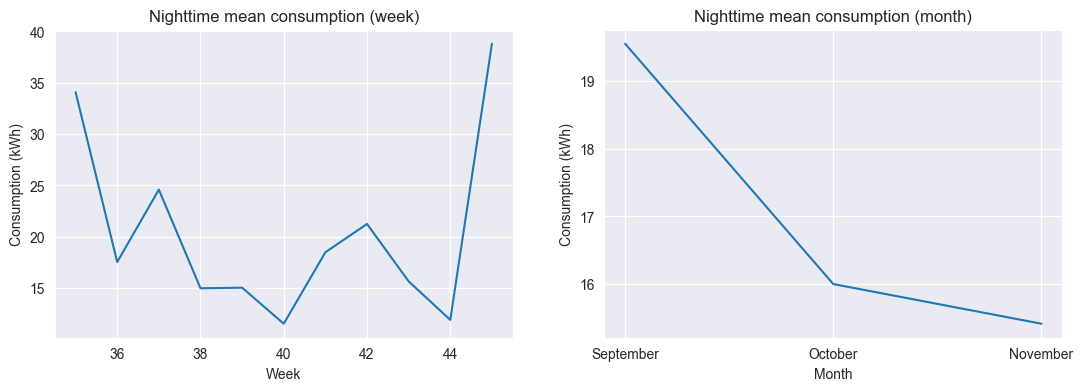

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))

# Rate of charge (weekly)
sns.lineplot(
    data=user_data_nighttime,
    x='Plugged_in_week',
    y='Verbrauch (kWh)',
    ax=ax[0],
    ci=None
)
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Consumption (kWh)')
ax[0].set_title('Nighttime mean consumption (week)')

# Rate of charge (monthly)
sns.lineplot(
    data=user_data_nighttime,
    x='Plugged_in_month',
    y='Verbrauch (kWh)',
    ax=ax[1],
    ci=None
)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Consumption (kWh)')
ax[1].set_xticks([9, 10, 11], labels=['September', 'October', 'November'])
ax[1].set_title('Nighttime mean consumption (month)')
plt.savefig('Images/Public/nighttime-demand-profile')
plt.show()